## Table Of Contents:
* [Exploratory Data Analysis](#first-bullet)
* [Data Pre-processing](#second-bullet)

# Exploratory Data Analysis <a class="anchor" id="first-bullet"></a>

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import imblearn

from sklearn.feature_selection import mutual_info_classif 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, KFold 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

pd.set_option('display.max_columns', None)

dataset = pd.read_csv('RTA Dataset.csv')

In [4]:
# shape of the dataset
dataset.shape

(12316, 32)

In [5]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
# renaming column names to be all lower case for convenience
dataset.columns = dataset.columns.str.lower()

In [7]:
dataset.dtypes

time                           object
day_of_week                    object
age_band_of_driver             object
sex_of_driver                  object
educational_level              object
vehicle_driver_relation        object
driving_experience             object
type_of_vehicle                object
owner_of_vehicle               object
service_year_of_vehicle        object
defect_of_vehicle              object
area_accident_occured          object
lanes_or_medians               object
road_allignment                object
types_of_junction              object
road_surface_type              object
road_surface_conditions        object
light_conditions               object
weather_conditions             object
type_of_collision              object
number_of_vehicles_involved     int64
number_of_casualties            int64
vehicle_movement               object
casualty_class                 object
sex_of_casualty                object
age_band_of_casualty           object
casualty_sev

In [8]:
# Converting Time feature to hour and minutes
dataset['time'] = pd.to_datetime(dataset['time'])
dataset['hour'] = dataset['time'].dt.hour
dataset['minute'] = dataset['time'].dt.minute
dataset.drop('time', axis=1, inplace = True)

<AxesSubplot:>

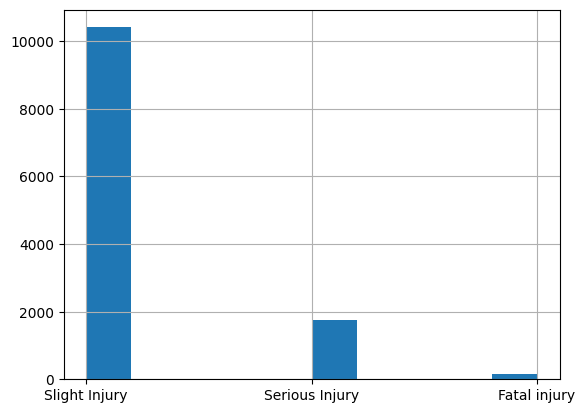

In [9]:
# Frequencies of various classes in target variable
dataset['accident_severity'].hist()

In [10]:
# Obtain the exact amount of percentage for each class
target_class_frequencies = dataset['accident_severity'].value_counts()
target_class_percentage = target_class_frequencies/sum(dataset['accident_severity'].value_counts())*100
print(target_class_percentage)

Slight Injury     84.564794
Serious Injury    14.152322
Fatal injury       1.282884
Name: accident_severity, dtype: float64


In [11]:
# Checking for duplicates in examples
dataset.duplicated()[dataset.duplicated()==True]

Series([], dtype: bool)

### Exploring categorical data

In [12]:
# Obtain number of unique values for each categorical variable
categorical_columns = [col for col in dataset.select_dtypes(include='object')]
dataset[categorical_columns].nunique().sort_values(ascending=False)

cause_of_accident          20
type_of_vehicle            17
area_accident_occured      14
vehicle_movement           13
type_of_collision          10
pedestrian_movement         9
road_allignment             9
weather_conditions          9
types_of_junction           8
lanes_or_medians            7
day_of_week                 7
work_of_casuality           7
driving_experience          7
educational_level           7
age_band_of_casualty        6
service_year_of_vehicle     6
fitness_of_casuality        5
road_surface_type           5
age_band_of_driver          5
light_conditions            4
road_surface_conditions     4
casualty_class              4
casualty_severity           4
owner_of_vehicle            4
vehicle_driver_relation     4
sex_of_casualty             3
defect_of_vehicle           3
sex_of_driver               3
accident_severity           3
dtype: int64

In [13]:
# Summary statistics of categorical features
dataset.describe(include='object')
# top is the most common value and freq is the most common value's frequency

,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,defect_of_vehicle,area_accident_occured,lanes_or_medians,road_allignment,types_of_junction,road_surface_type,road_surface_conditions,light_conditions,weather_conditions,type_of_collision,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
count,12316,12316,12316,11575,11737,11487,11366,11834,8388,7889,12077,11931,12174,11429,12144,12316,12316,12316,12161,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,7,5,3,7,4,7,17,4,6,3,14,7,9,8,5,4,4,9,10,13,4,3,6,4,7,5,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,Other,Two-way (divided with broken lines road marking),Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,2041,4271,11437,7619,9627,3363,3205,10459,2883,7777,3819,4411,10459,4543,11296,9340,8798,10063,8774,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


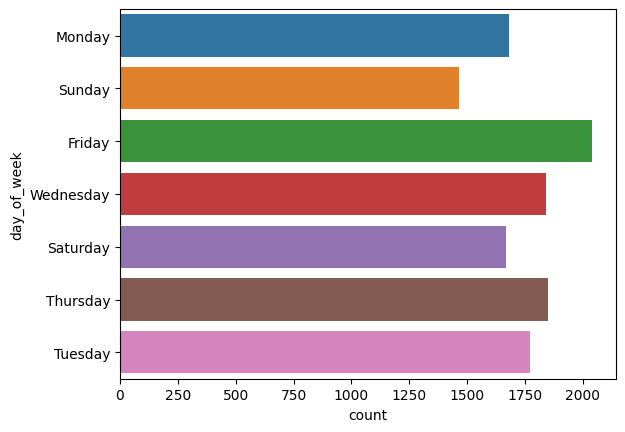

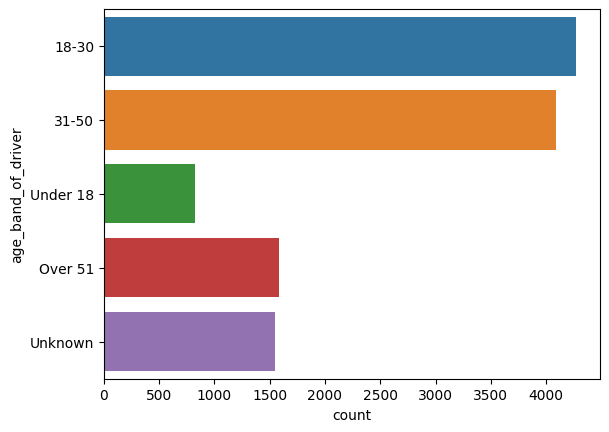

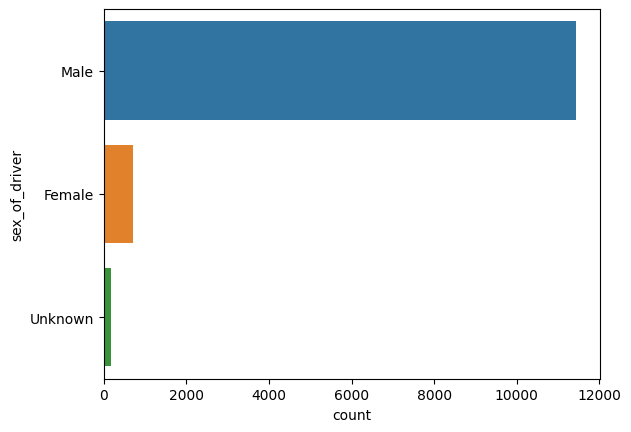

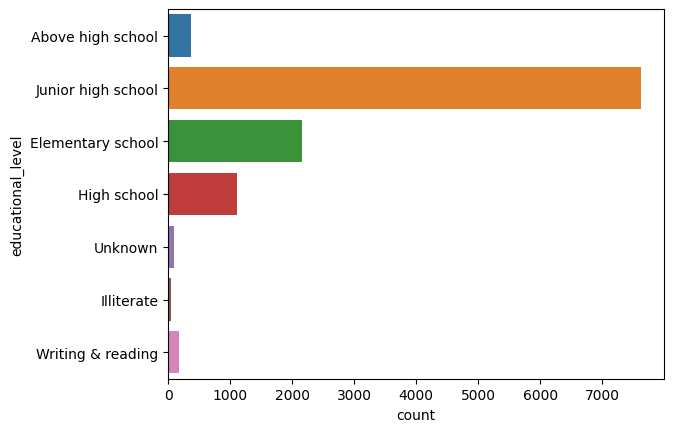

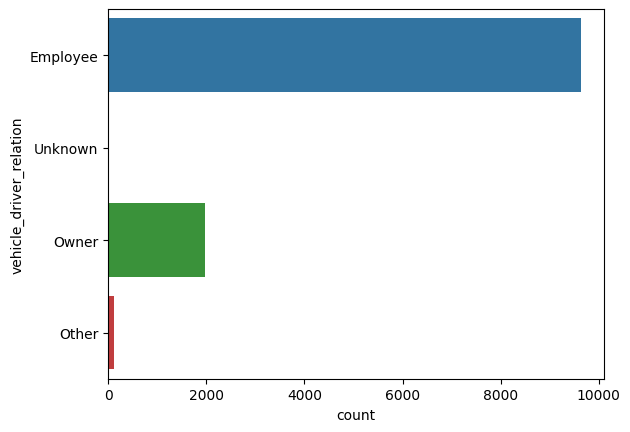

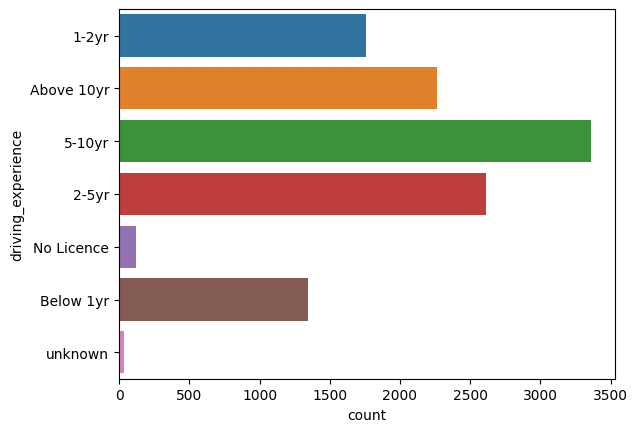

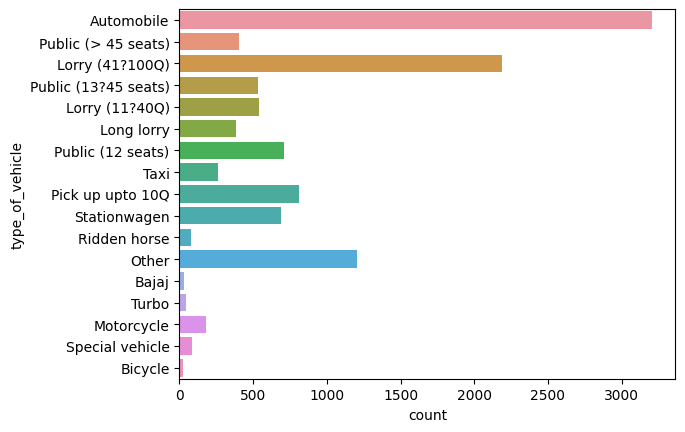

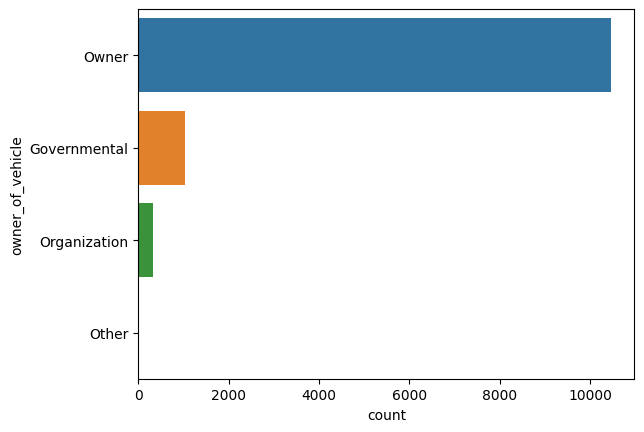

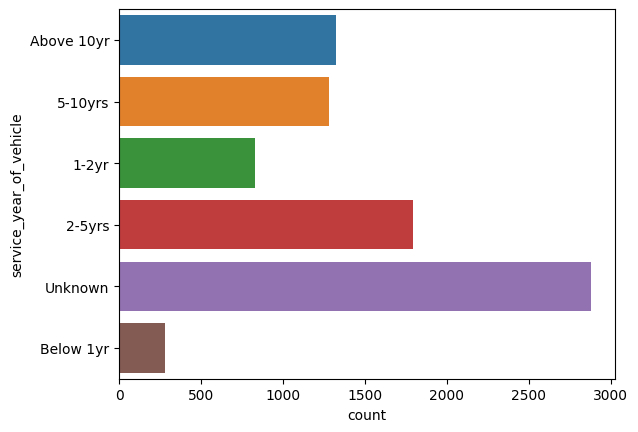

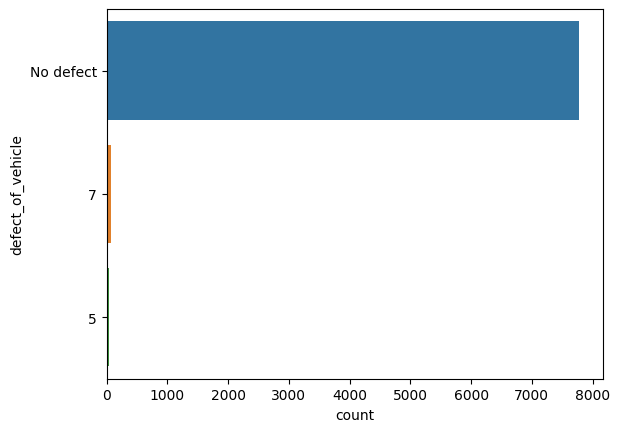

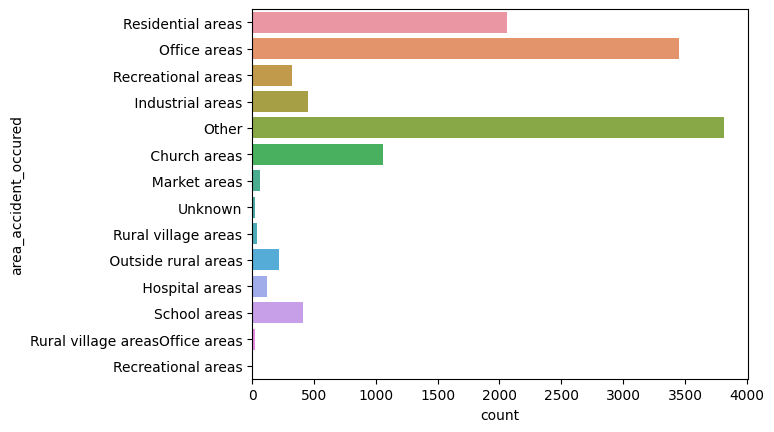

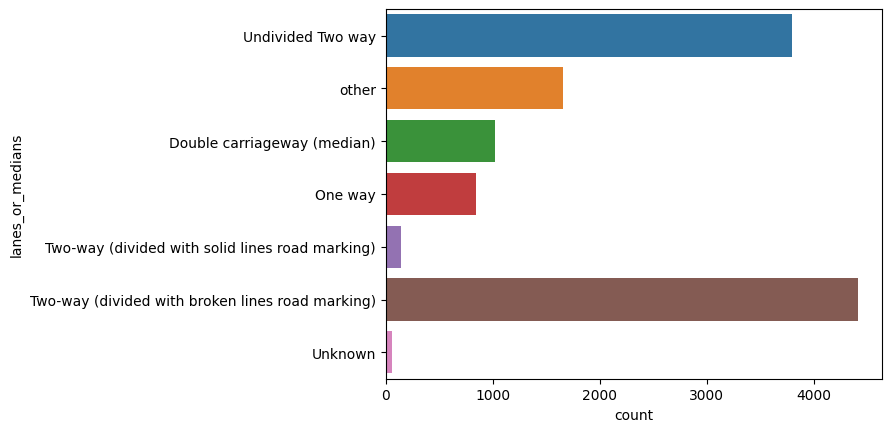

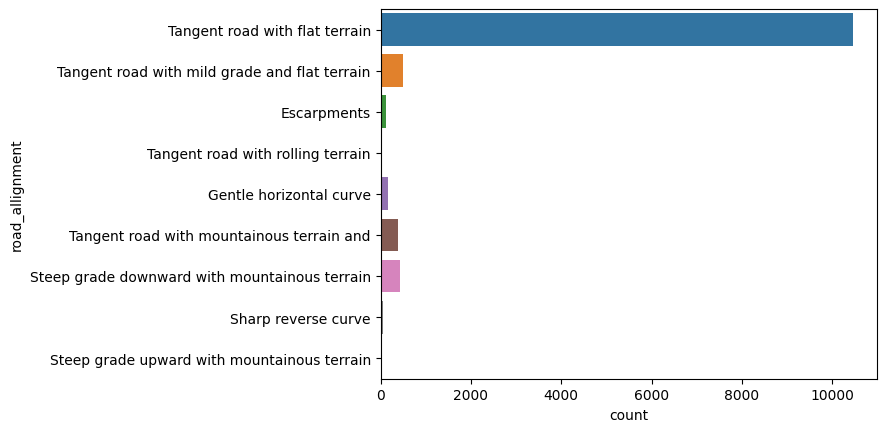

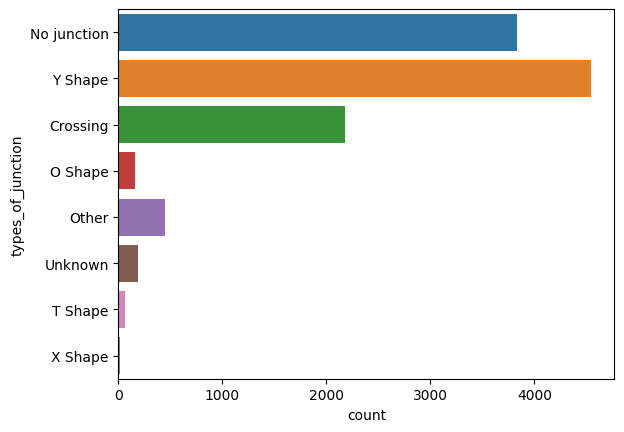

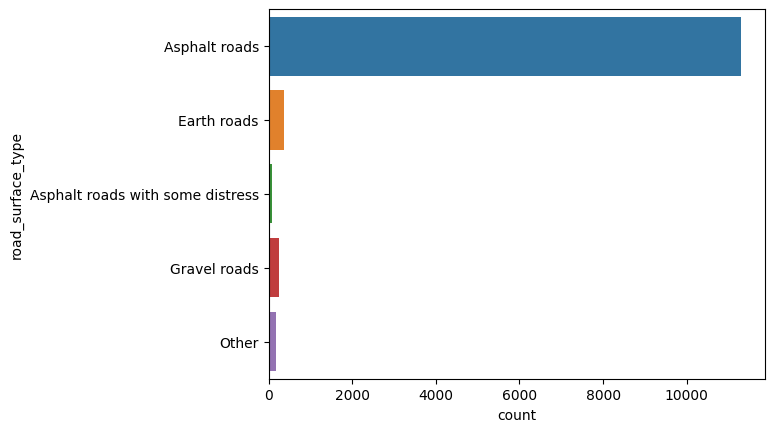

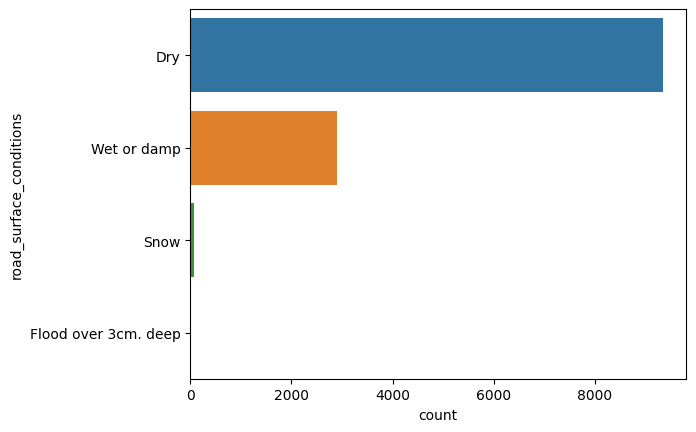

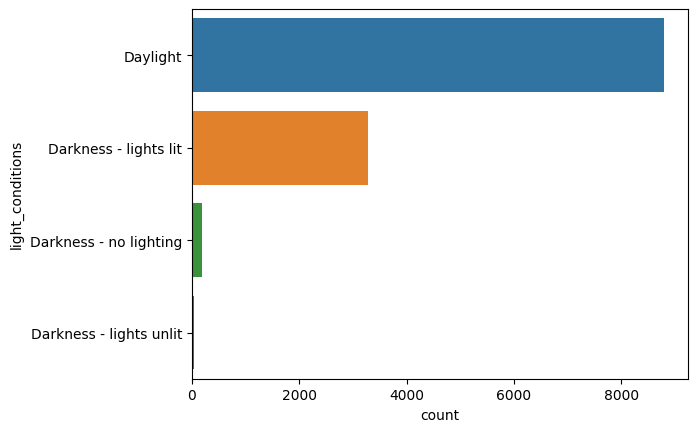

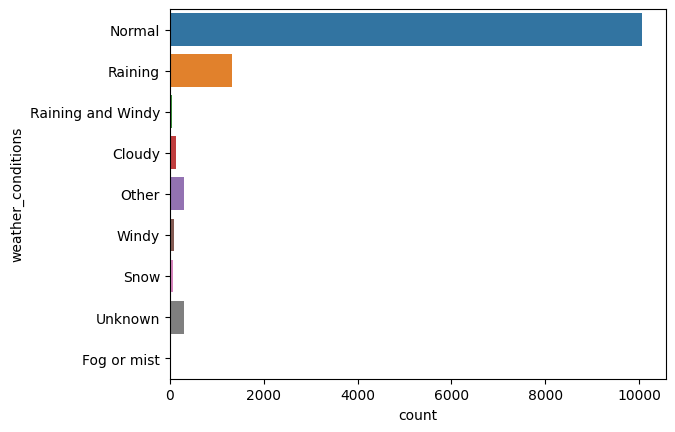

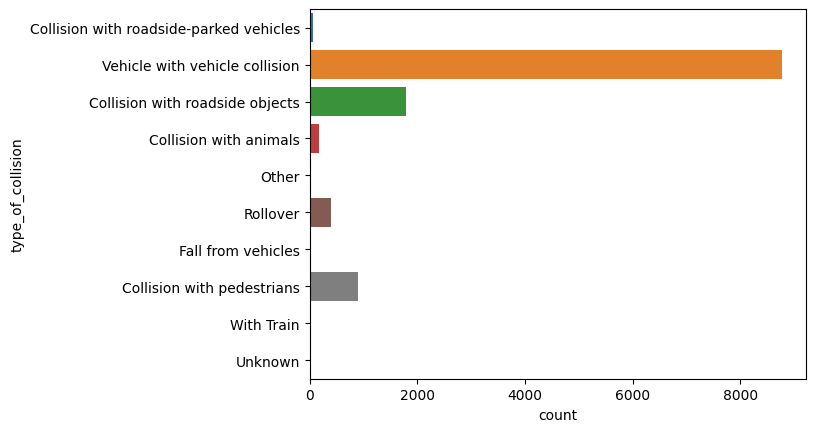

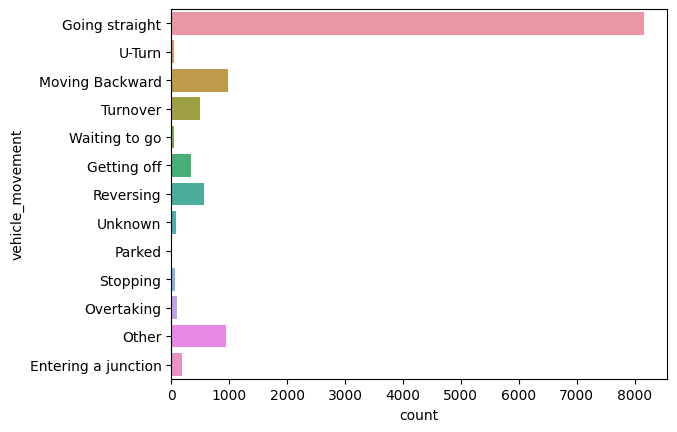

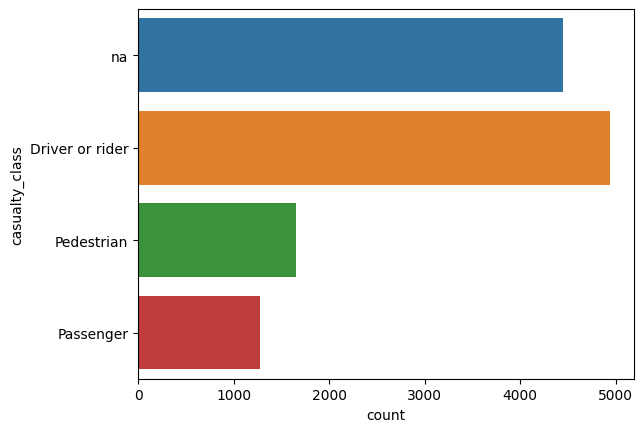

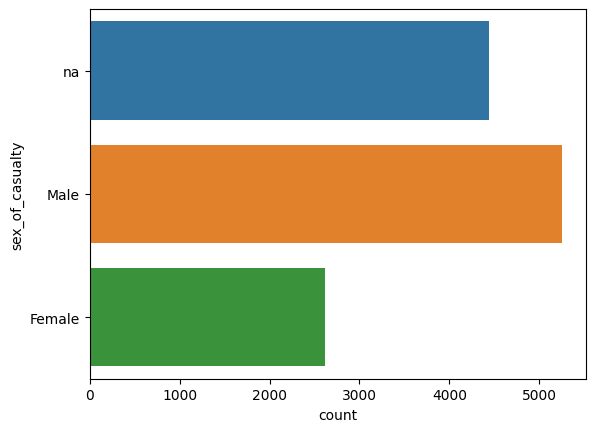

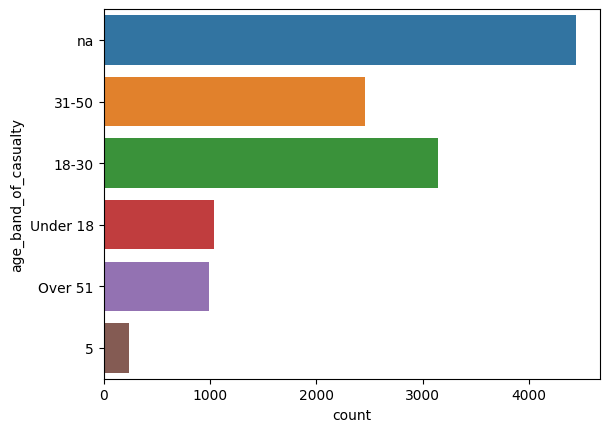

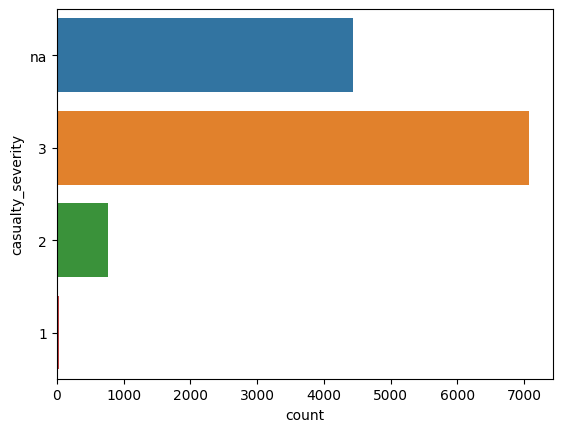

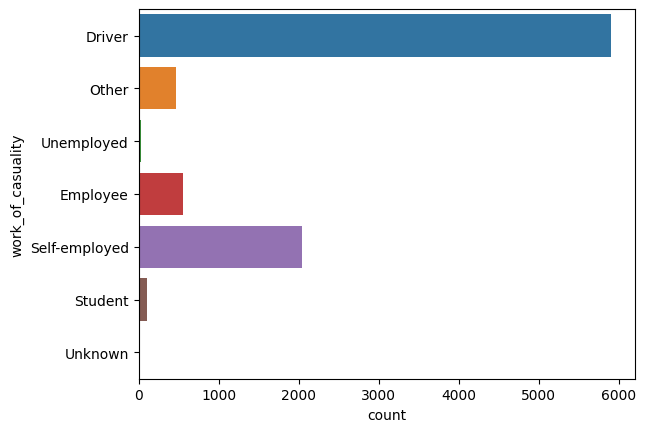

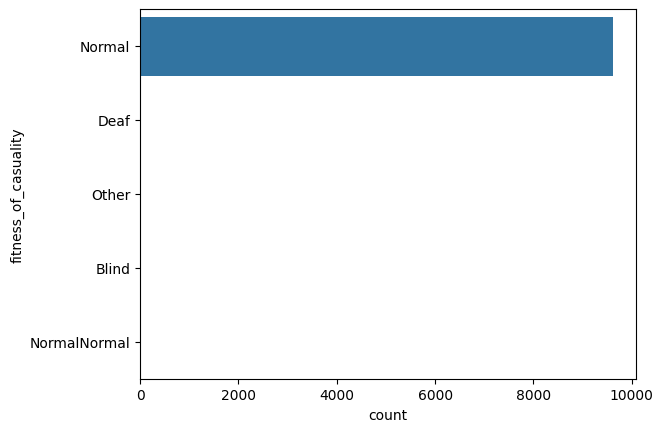

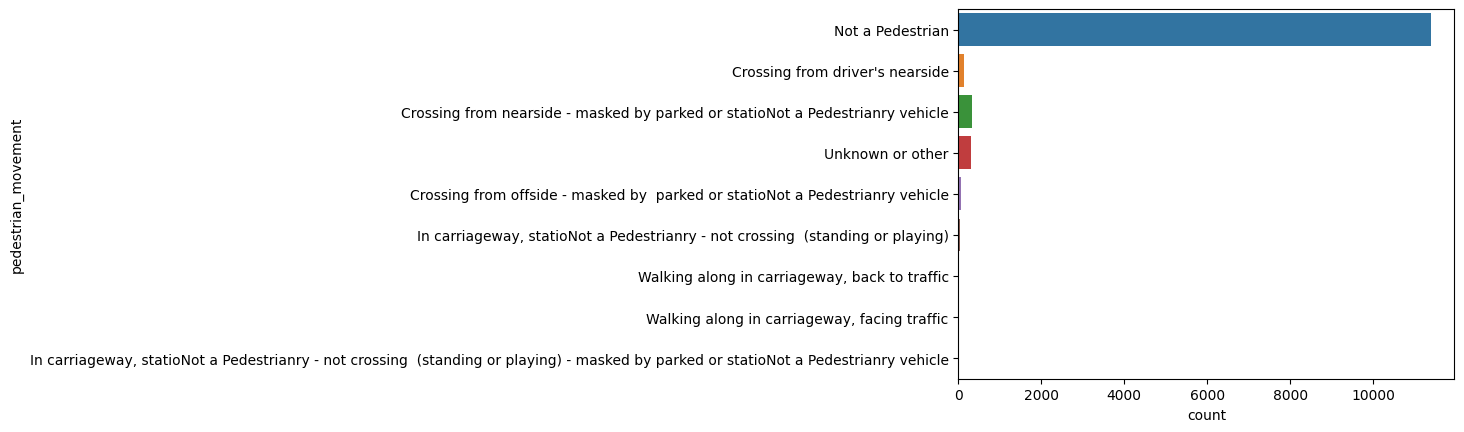

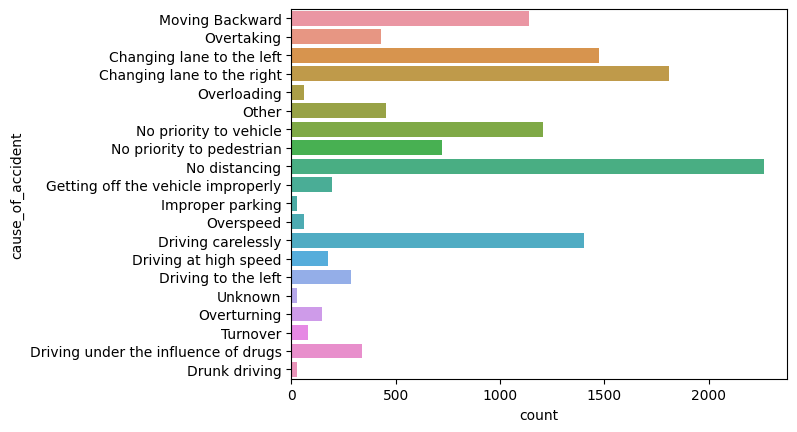

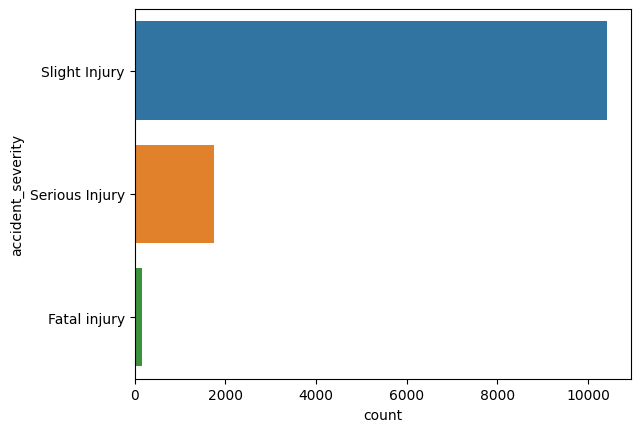

In [14]:
# Plotting histograms for categorical data 
for col in categorical_columns:
    sns.countplot(y=col, data=dataset)
    plt.show()

Observations:
1. Most of the accidents happened on Fridays. Fewest happened on Sundays and Saturdays.


2. Most of the drivers 
    - are between ages 18-30 and 31-50.
    - are male. (It's an overwhelming majority.)
    - have educational level of Junior High School.
    - are employees instead of owners of the vehicle.
    - have driving experience of 5-10 years. 


3. Most of the vehicles
    - are automobiles and lorries.
    - have no defects.


4. Most of the accidents
    - happened in 'Other' areas, followed by 'Office areas' and 'Residental areas'.
    - happened on a two-way road (which is divided with broken lines road marking) or an undivided two-way. 
    - happened on a Y-shape junction or no junction at all.
    - happened in daylight or with lights lit in darkness.
    - involved a vehicle-with-vehicle collision and involved a vehicle going straight.
    - happened because of no distance between vehicles.


5. Most of the casualties
    - are driver or rider
    - are male 
    - are in age range 18-30
    - are quite severe (3 on the scale of 1-3)
    - are drivers

The meaning of 'owner of vehicle', 'service year of vehicle' and 'vehicle driver relation' is not clear. 

Are 'road alignment', 'fitness of casualty', 'pedestrian movement' and 'road surface type' useful features at all? Only one category is dominant in these features. Confirm with catplots below.
Interestingly, while the number of drivers is dominantly male, the number of casualties is not.

/Users/alishehper/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


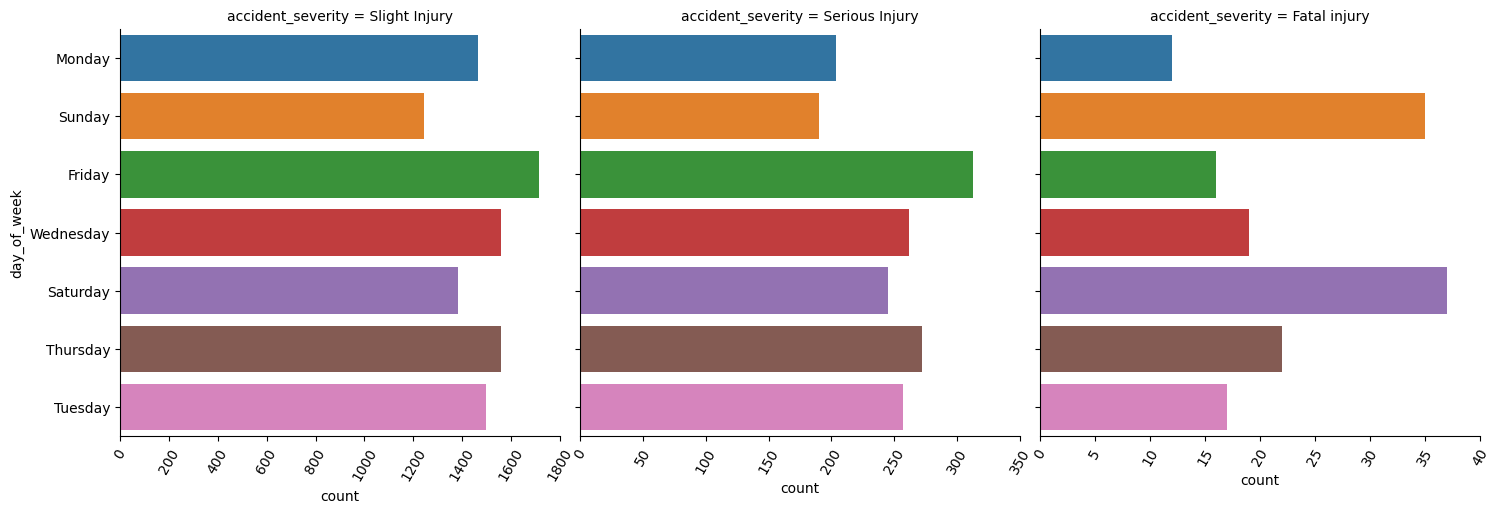

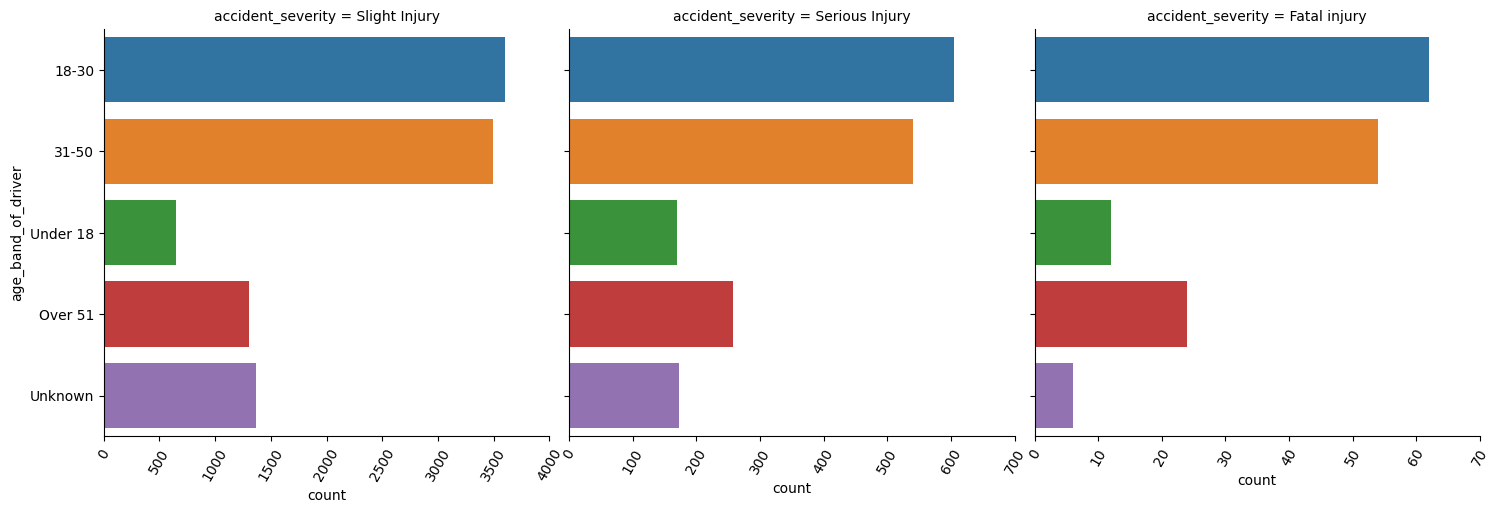

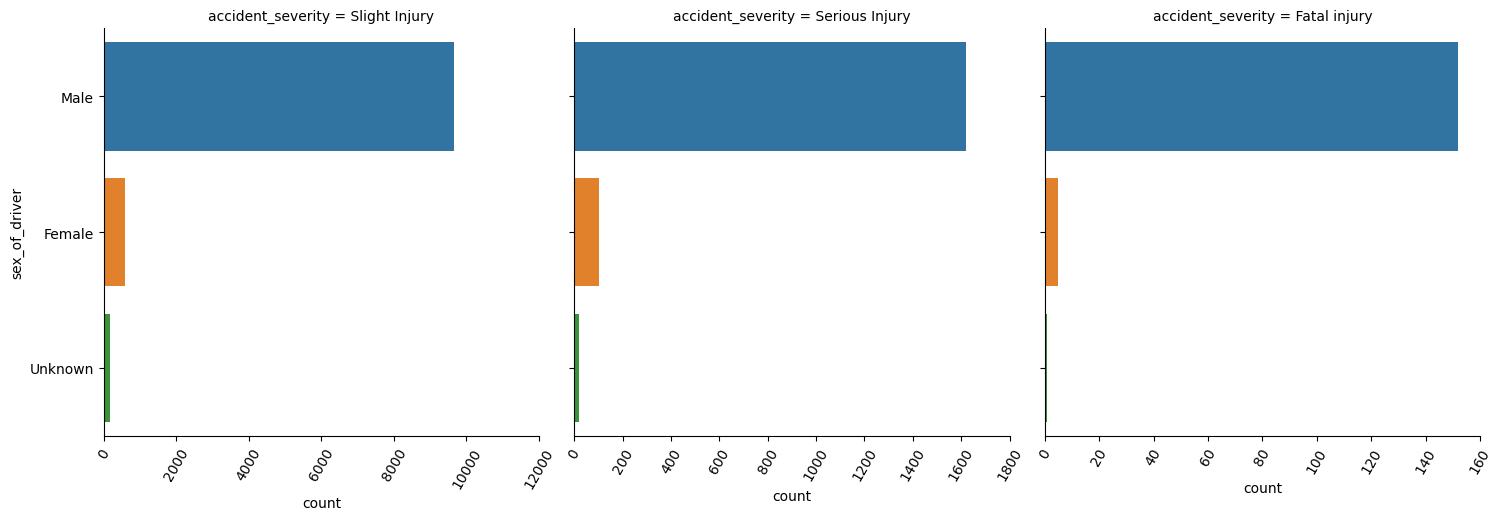

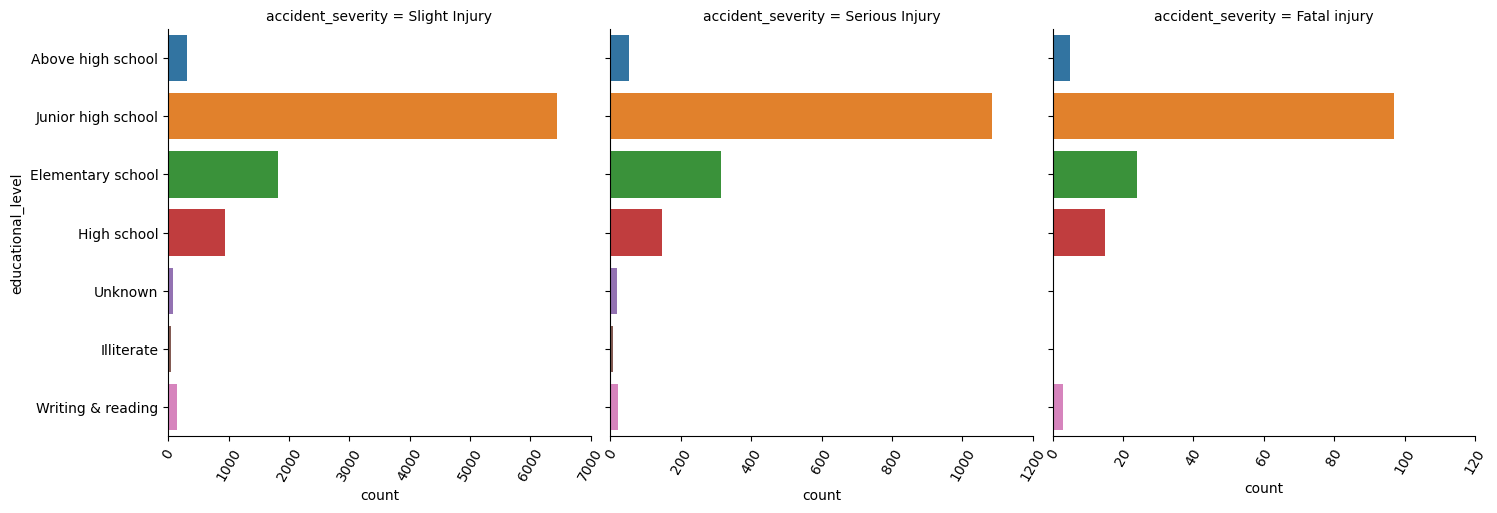

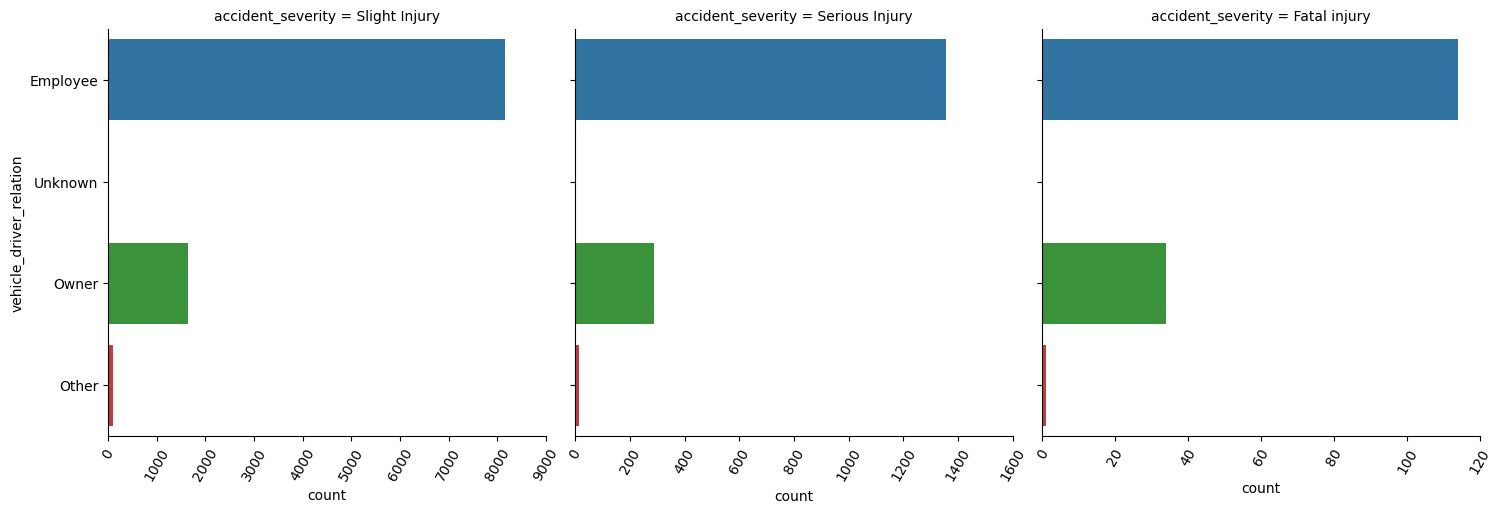

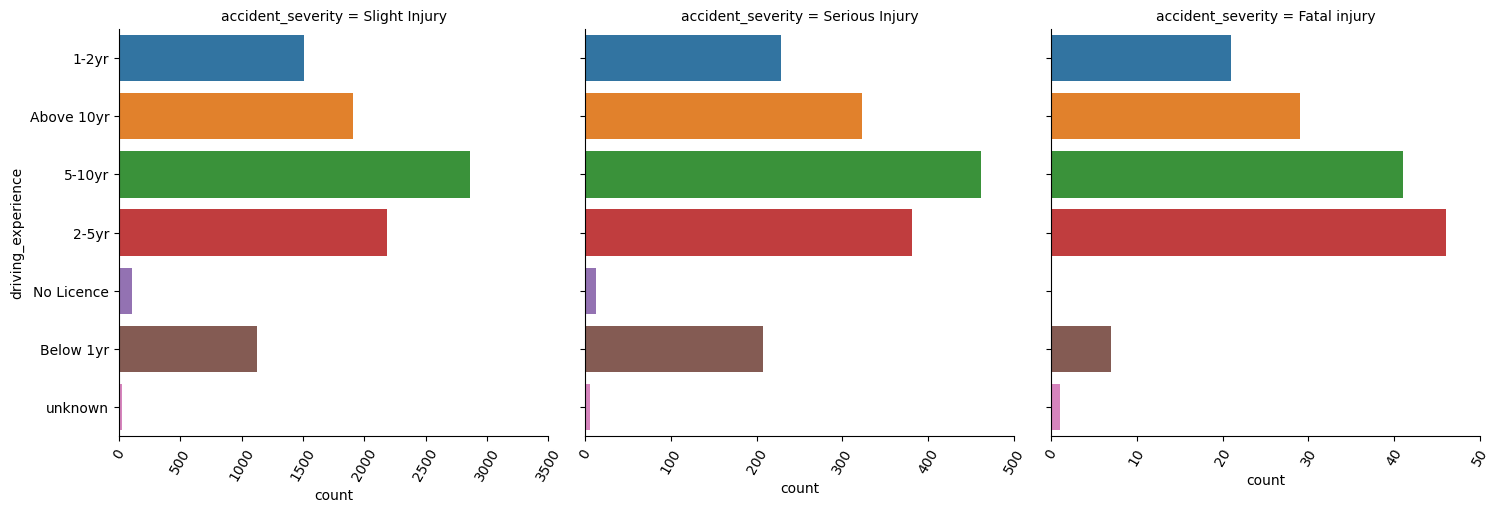

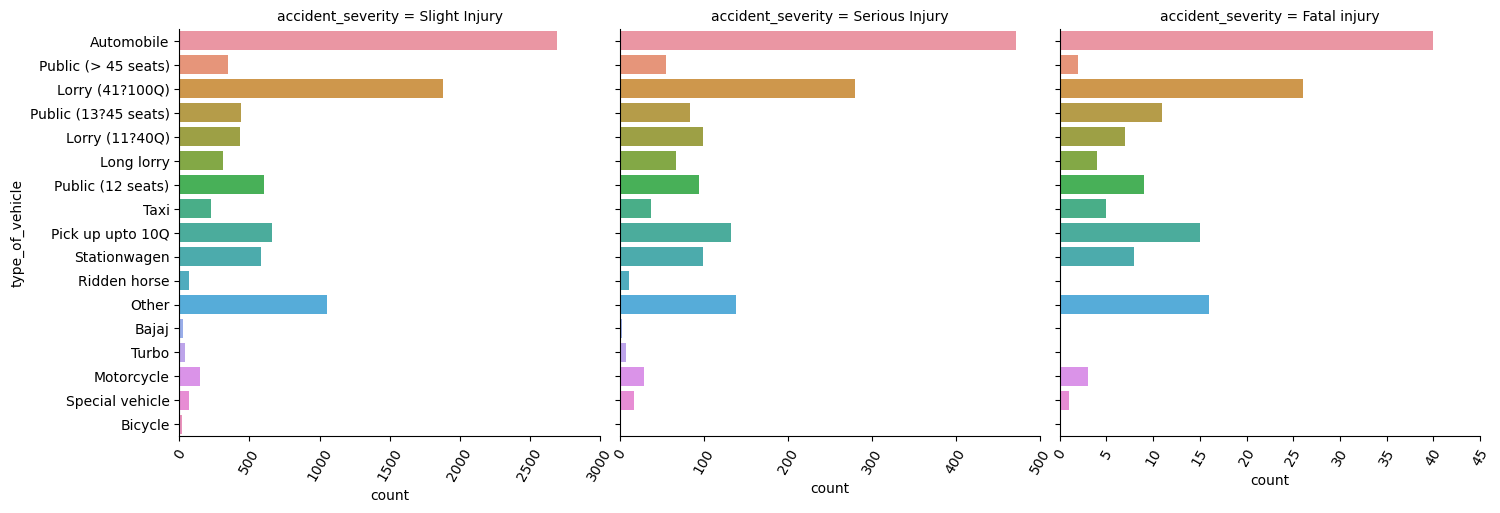

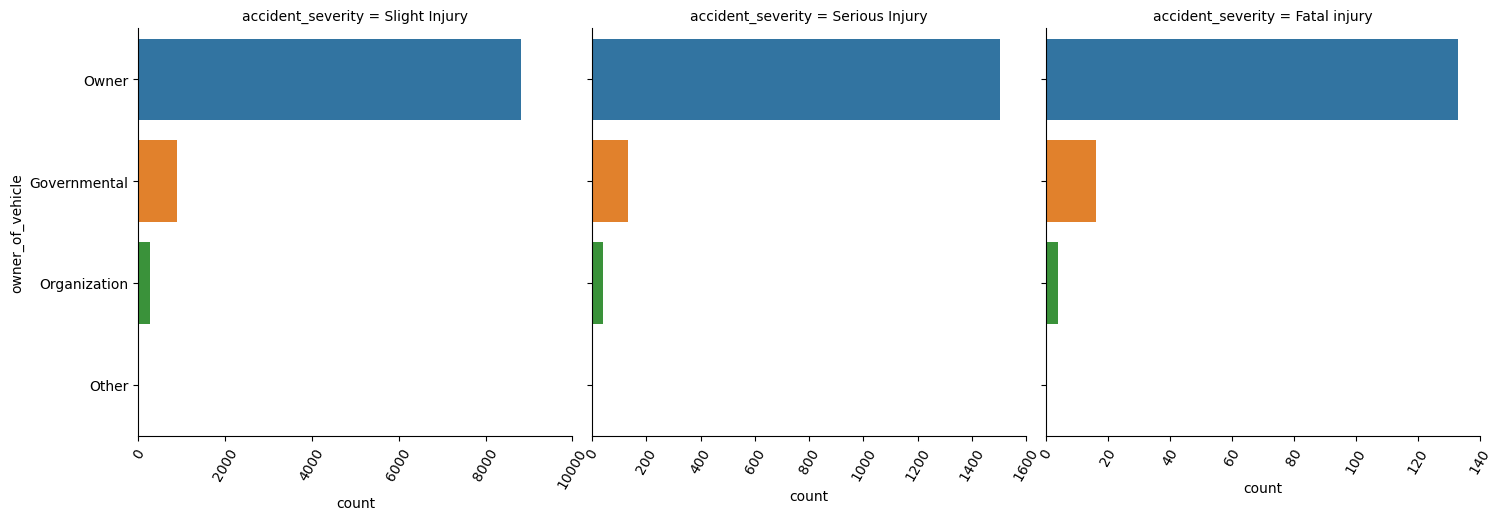

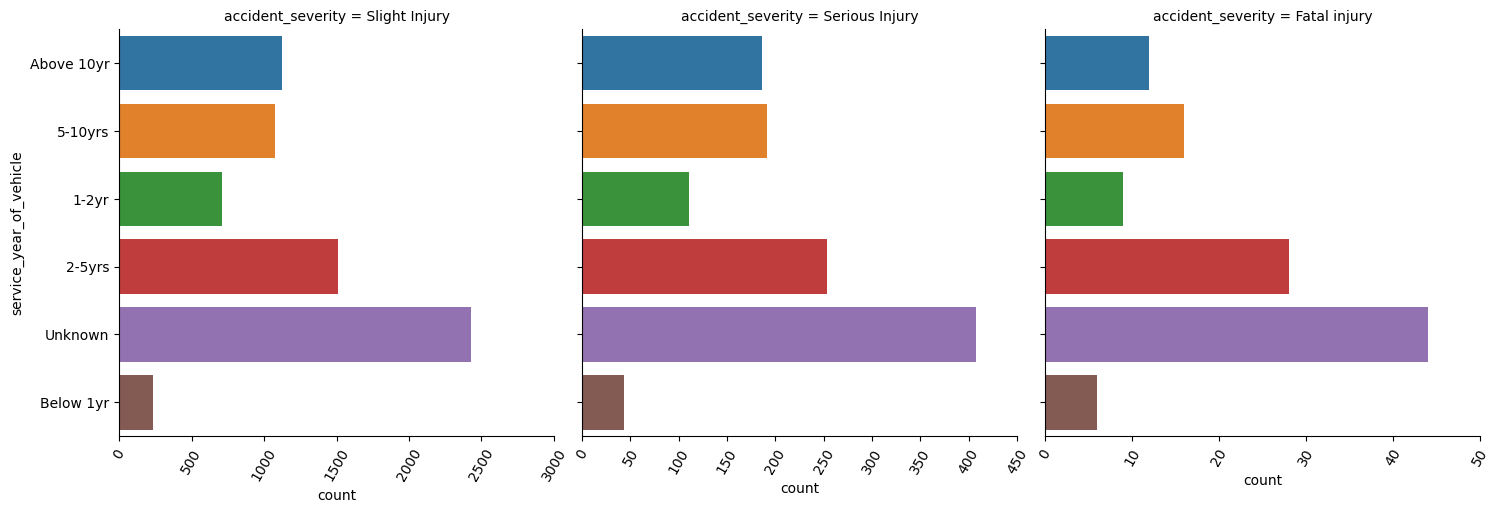

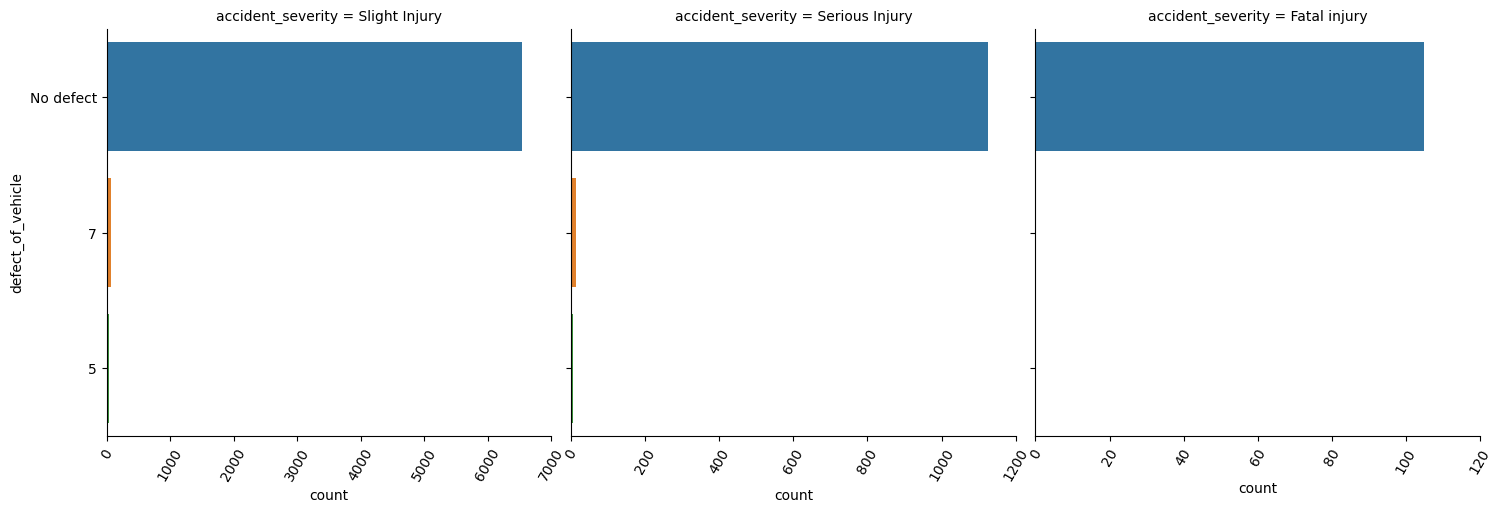

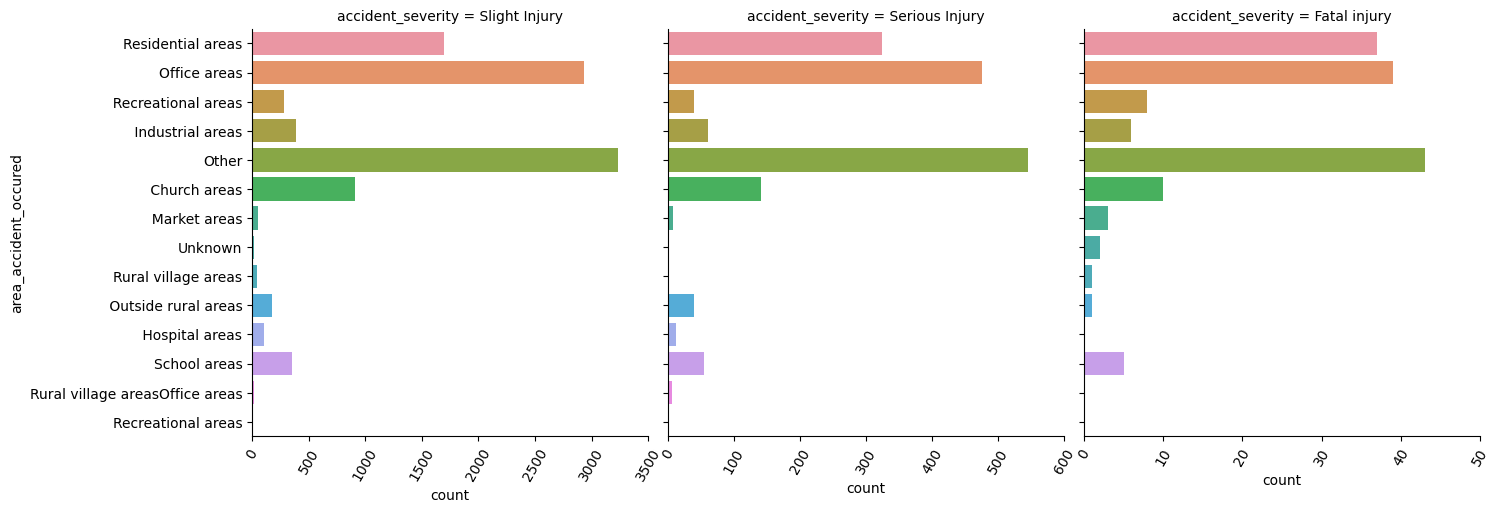

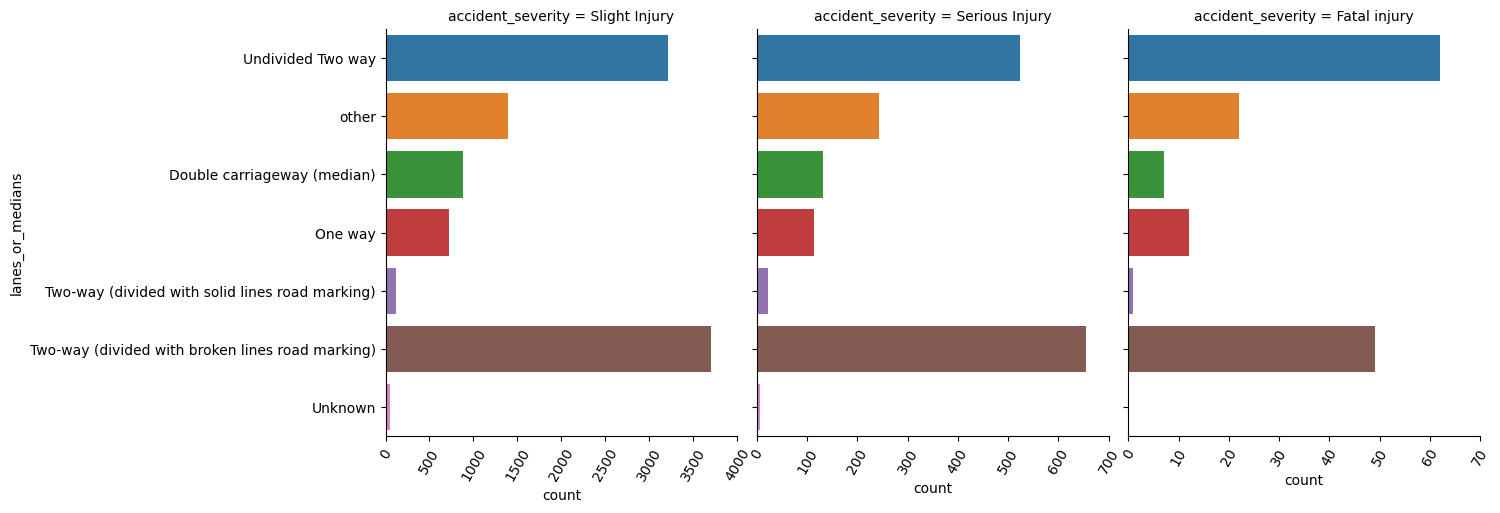

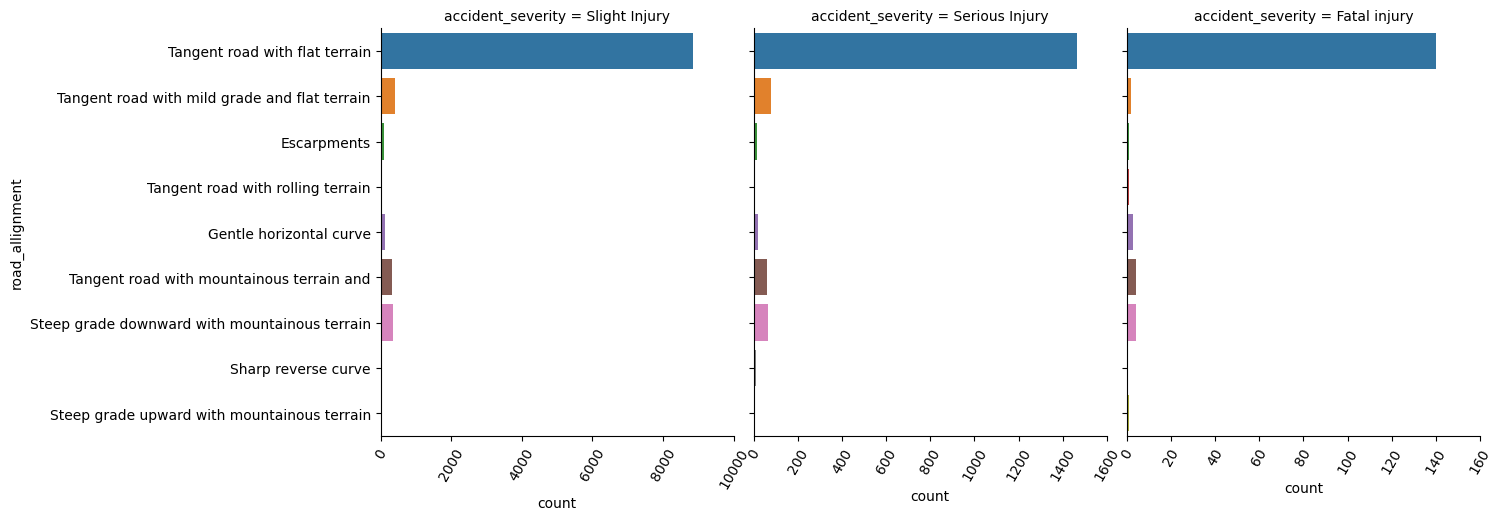

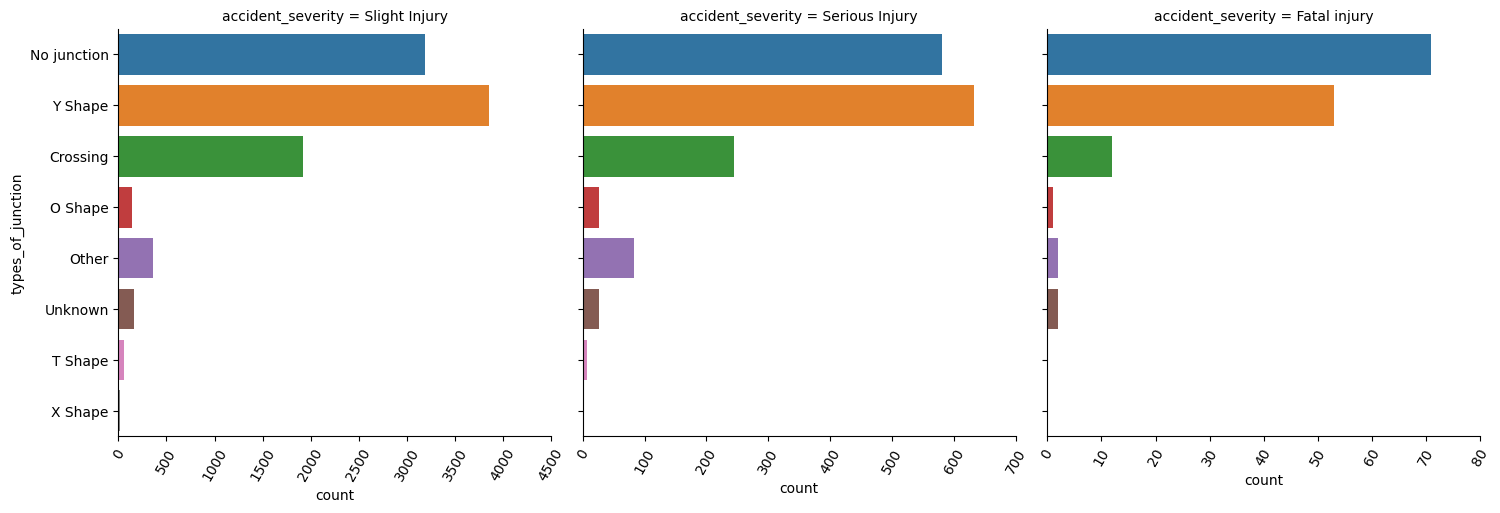

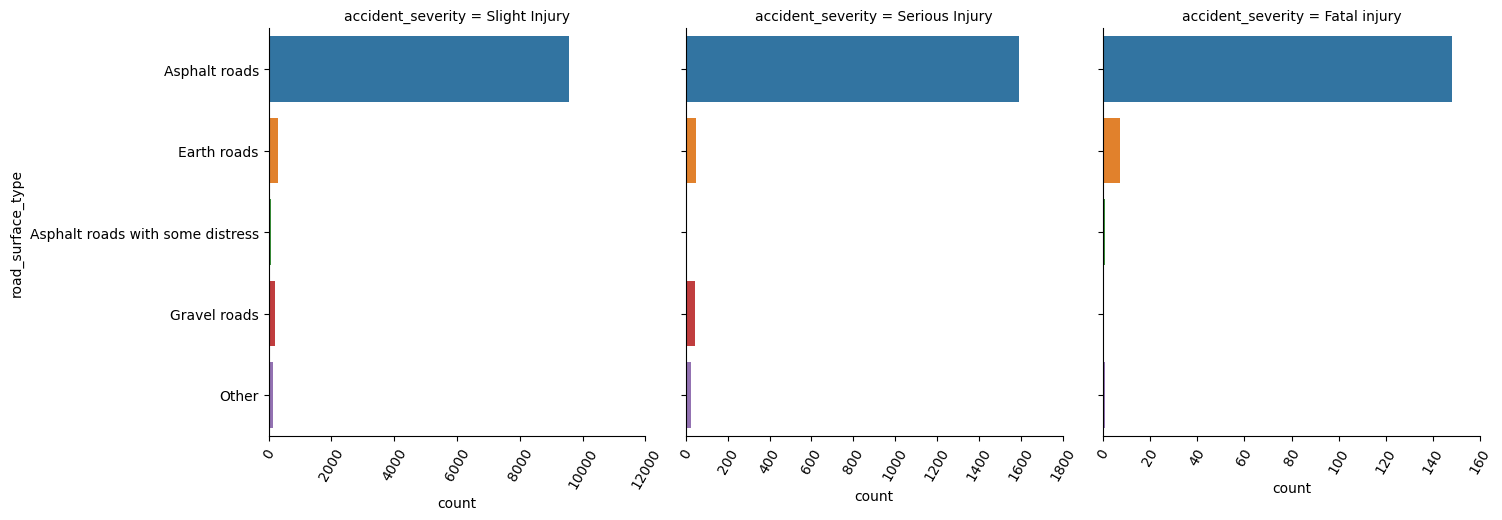

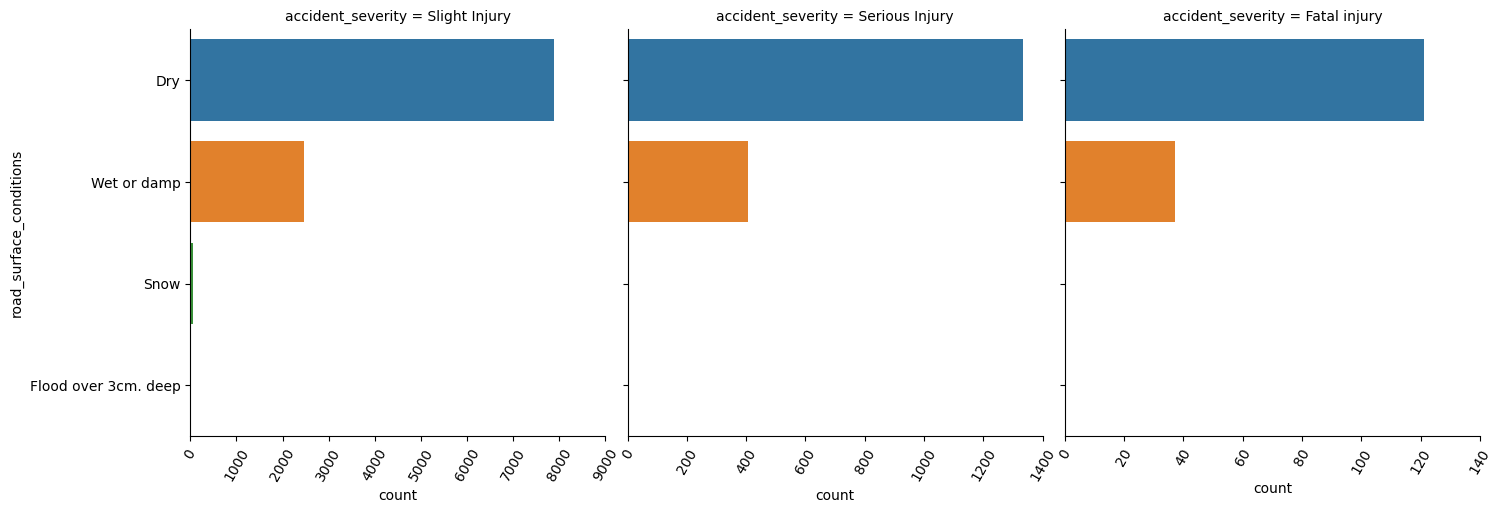

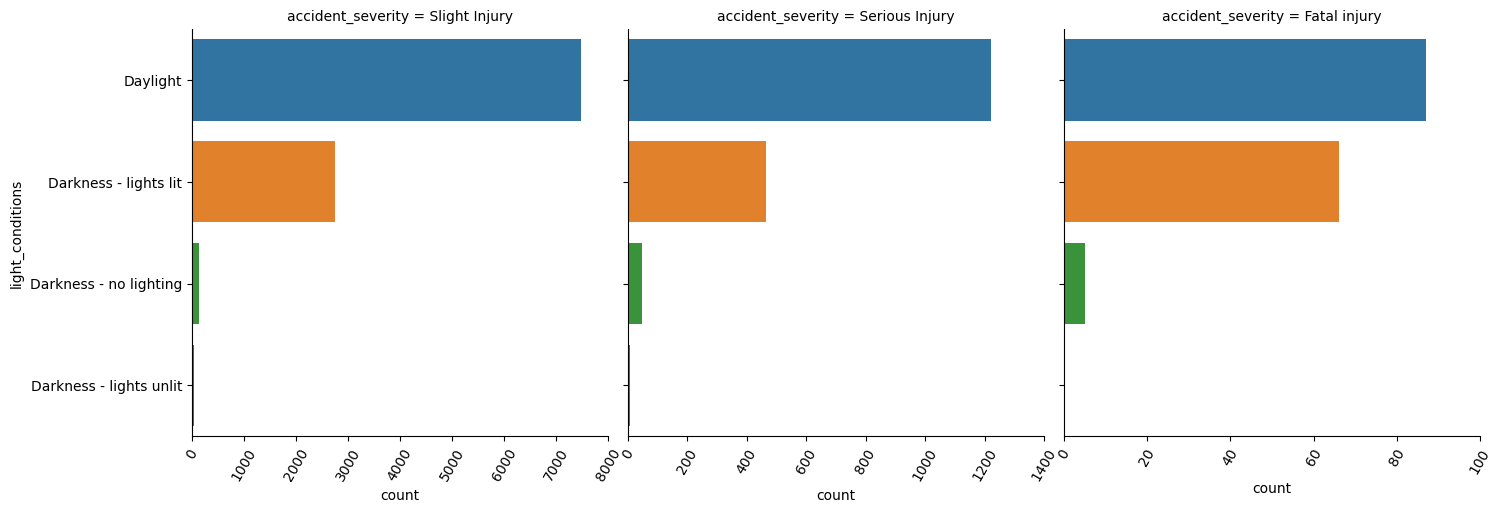

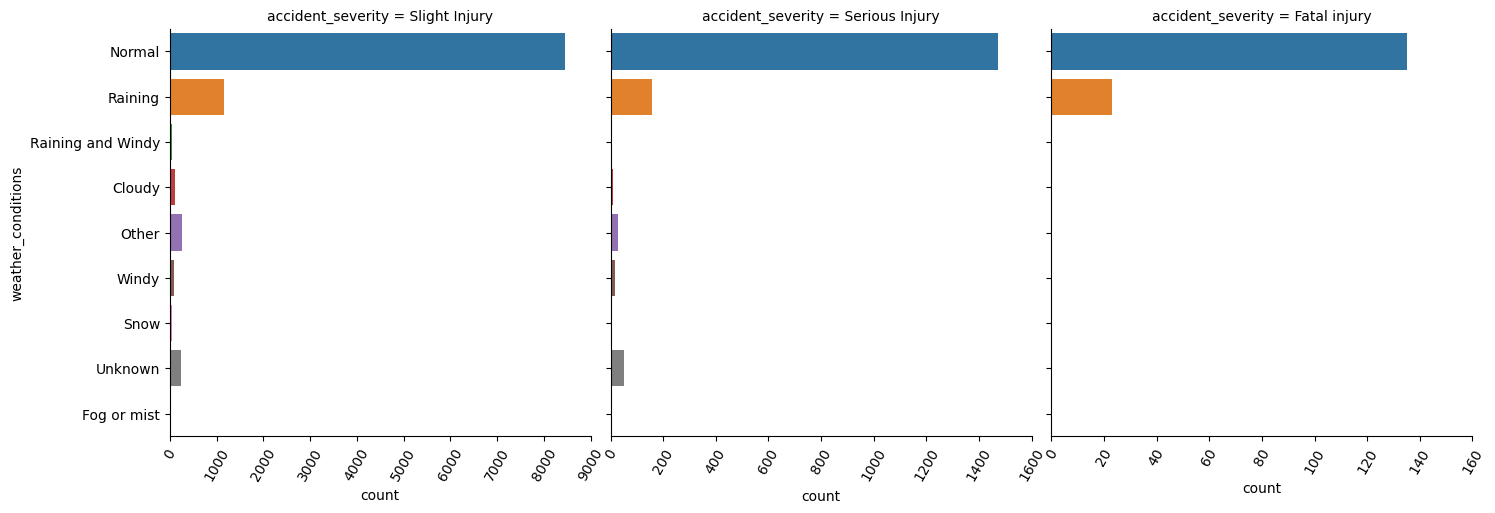

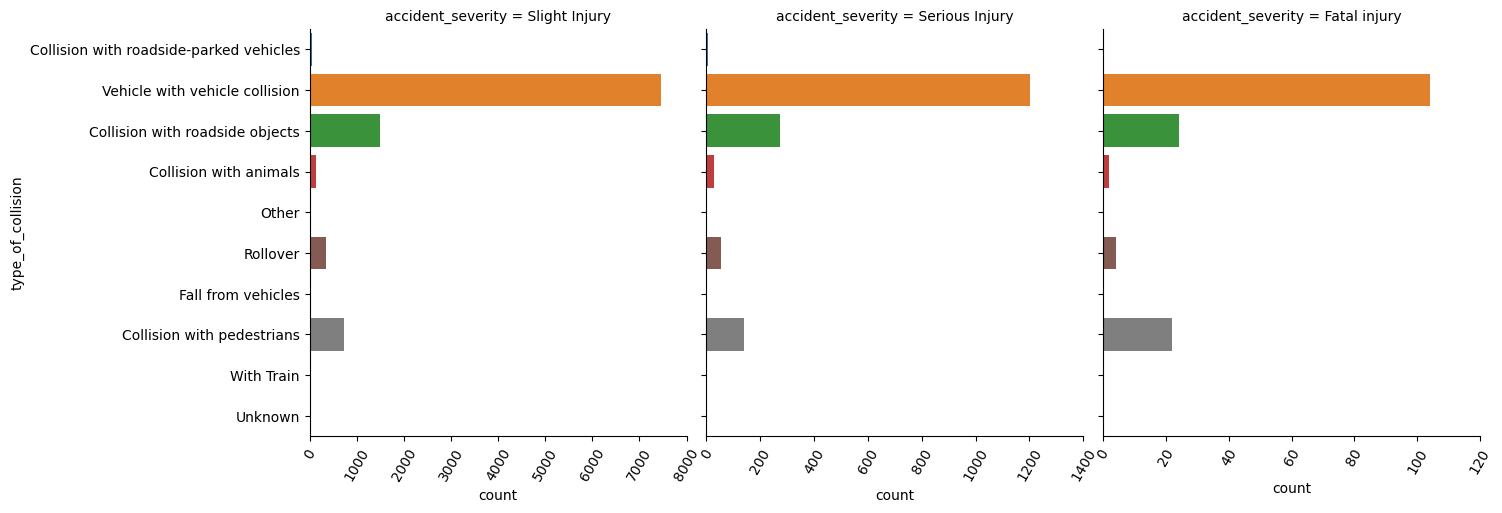

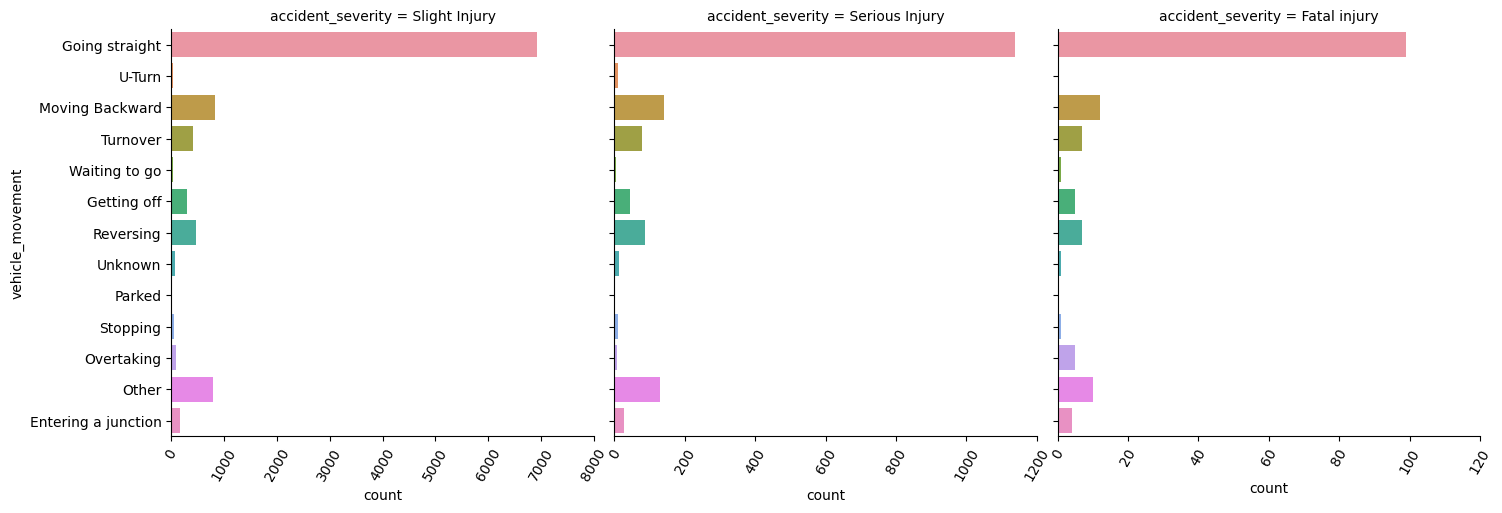

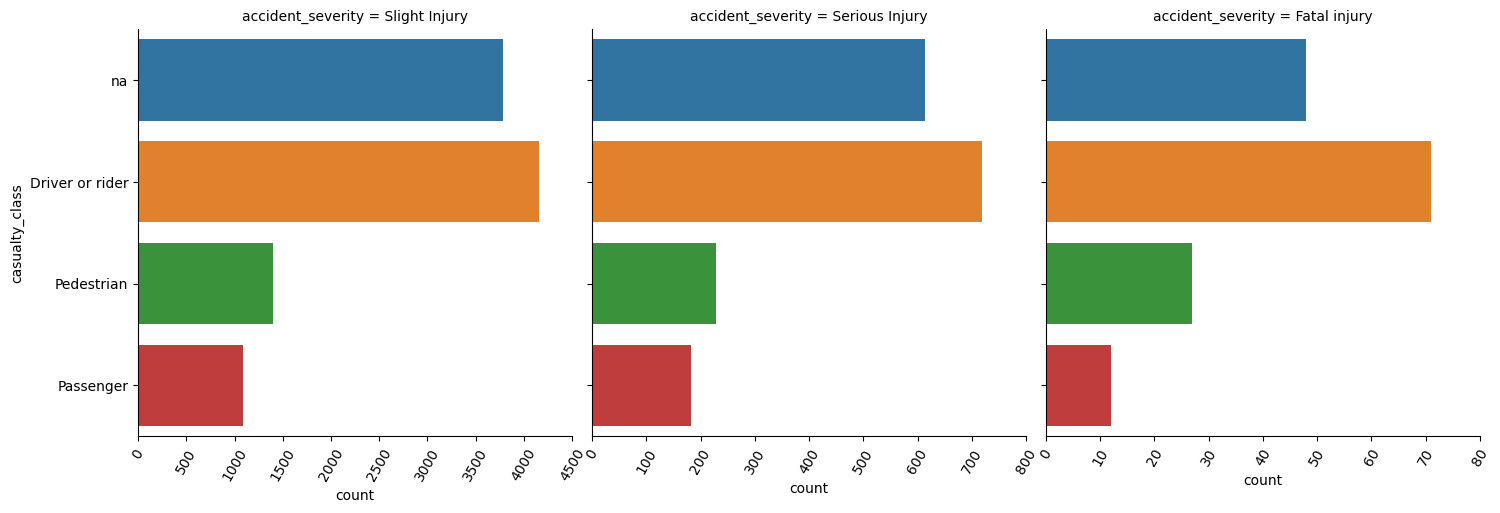

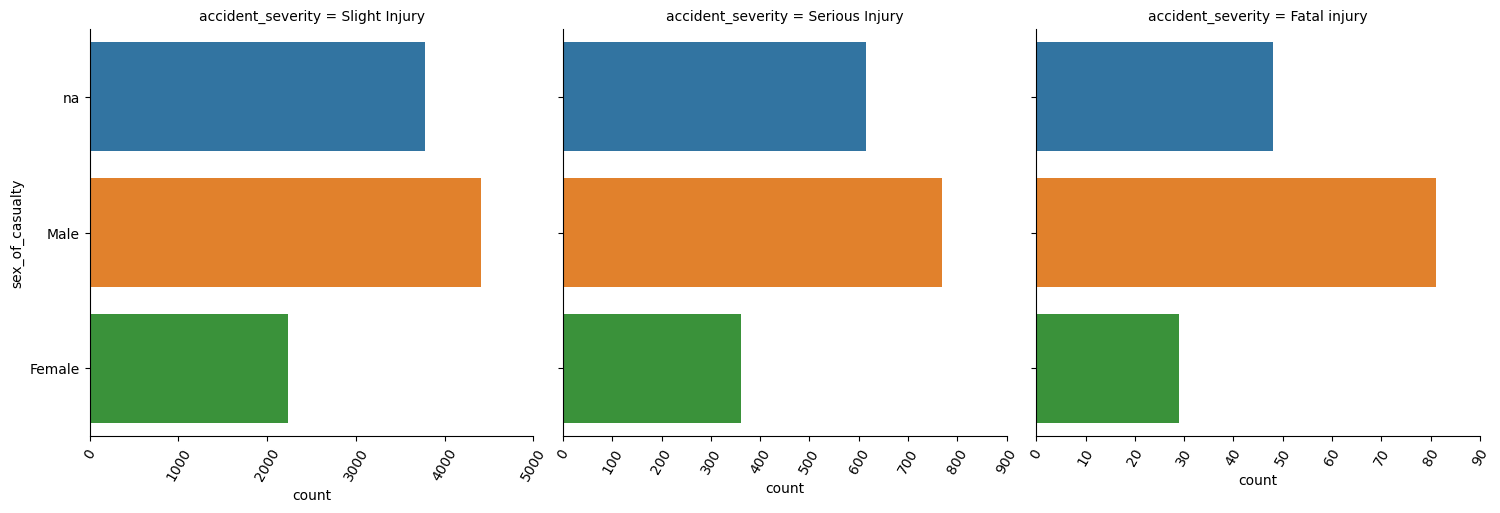

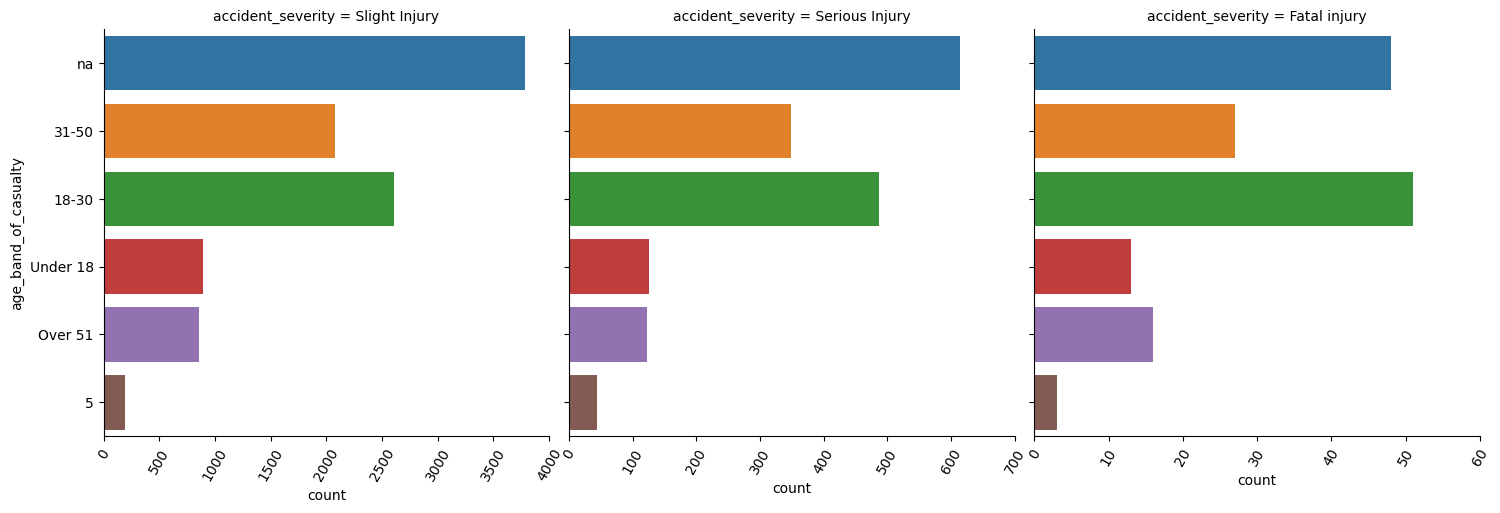

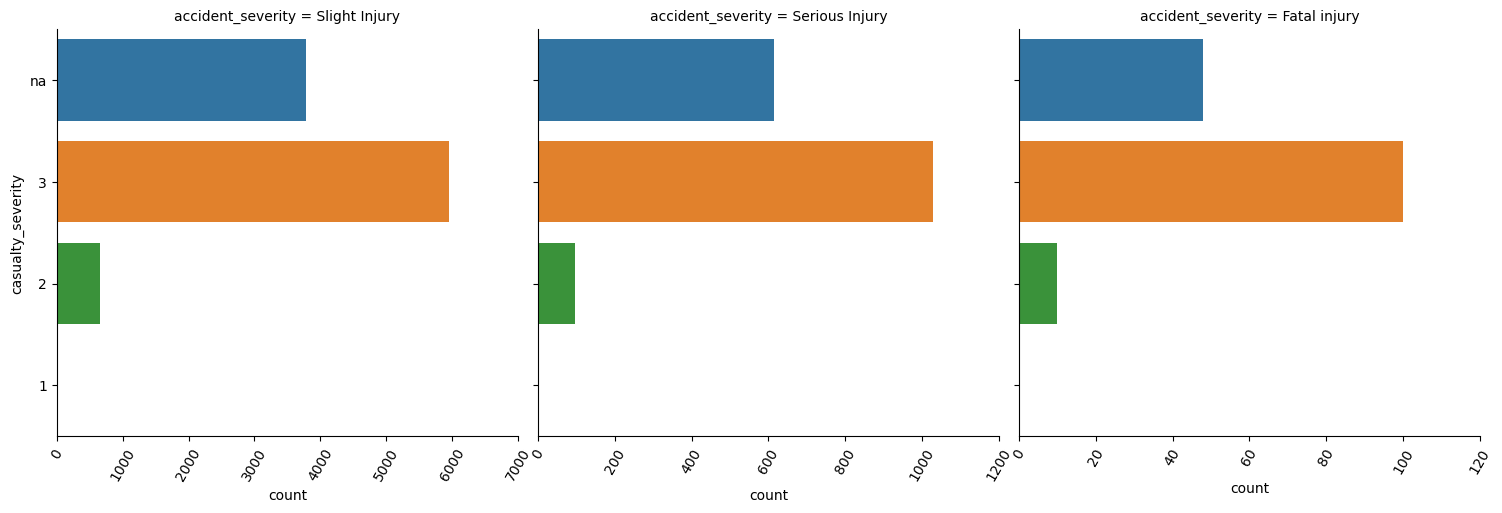

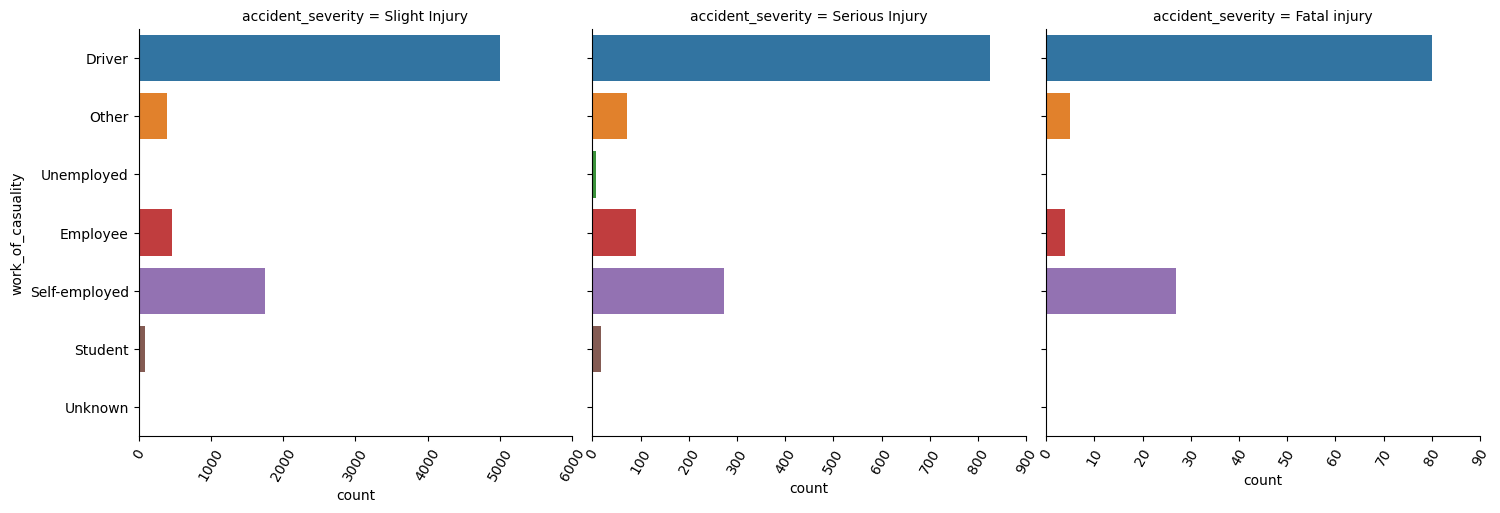

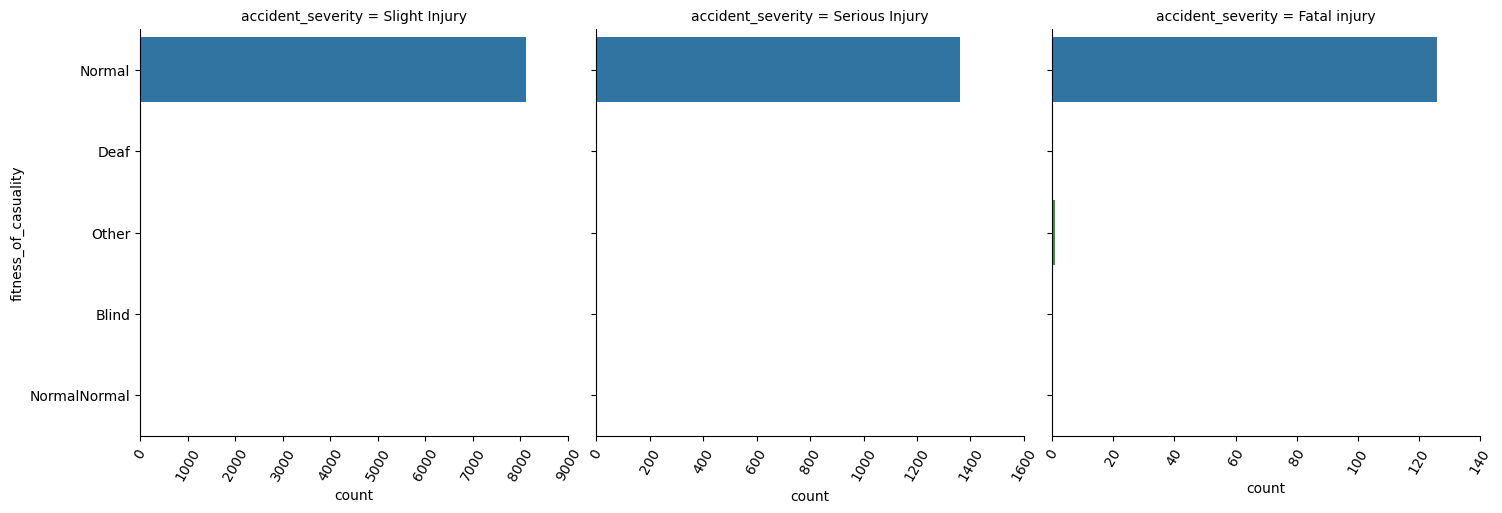

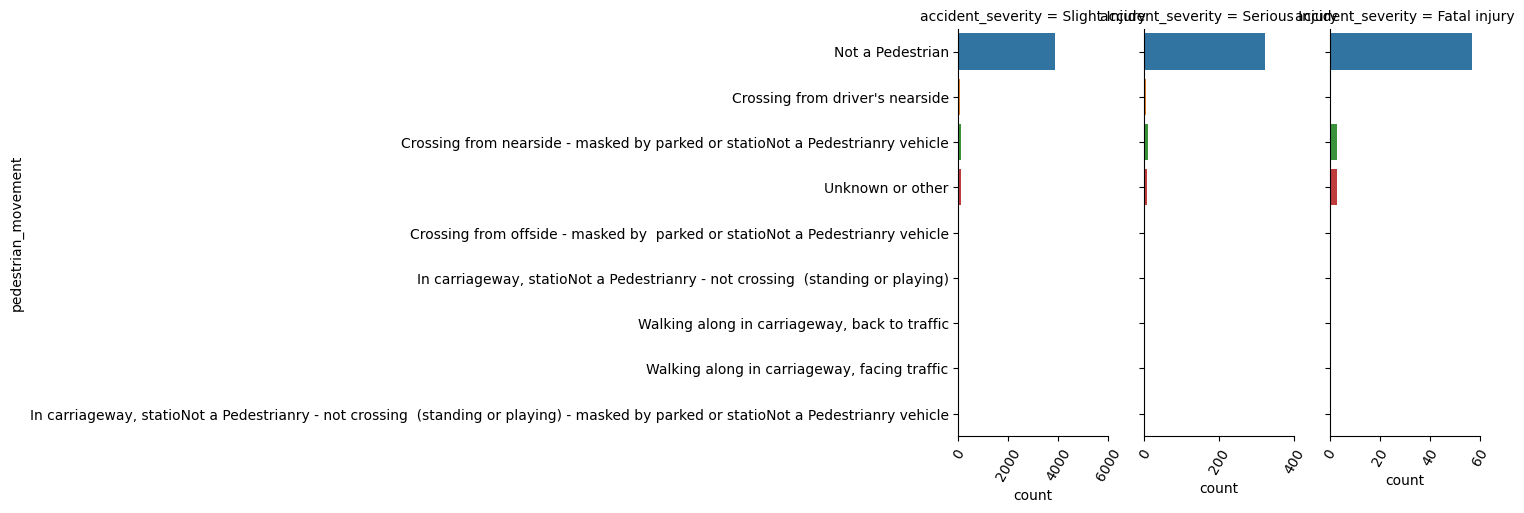

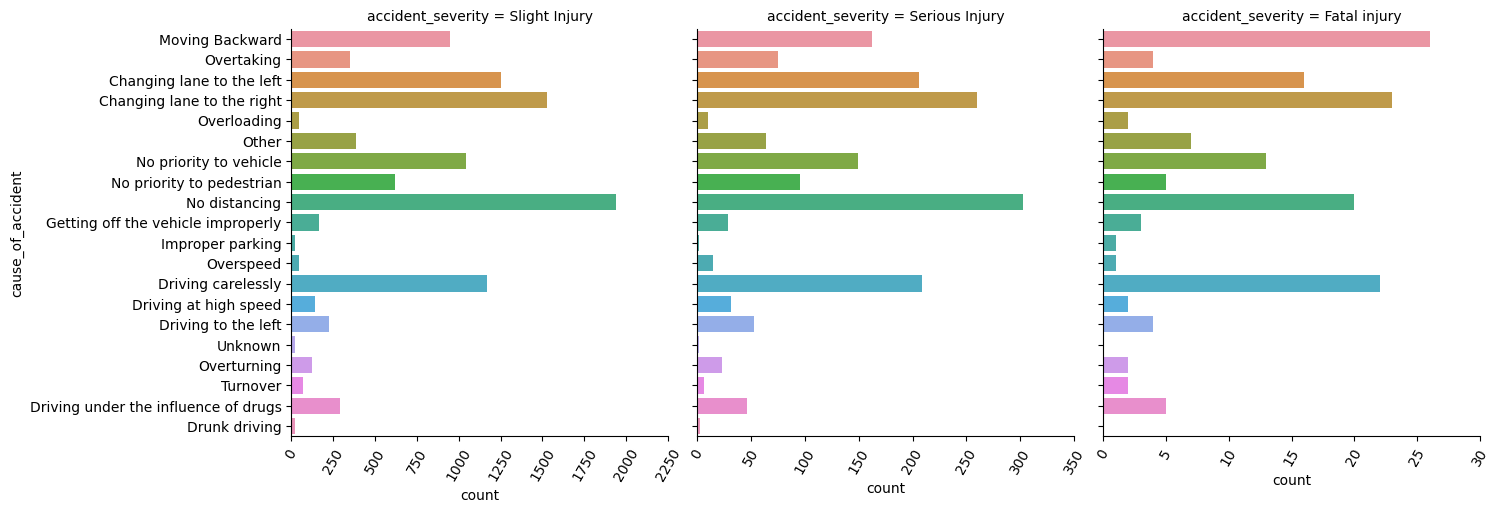

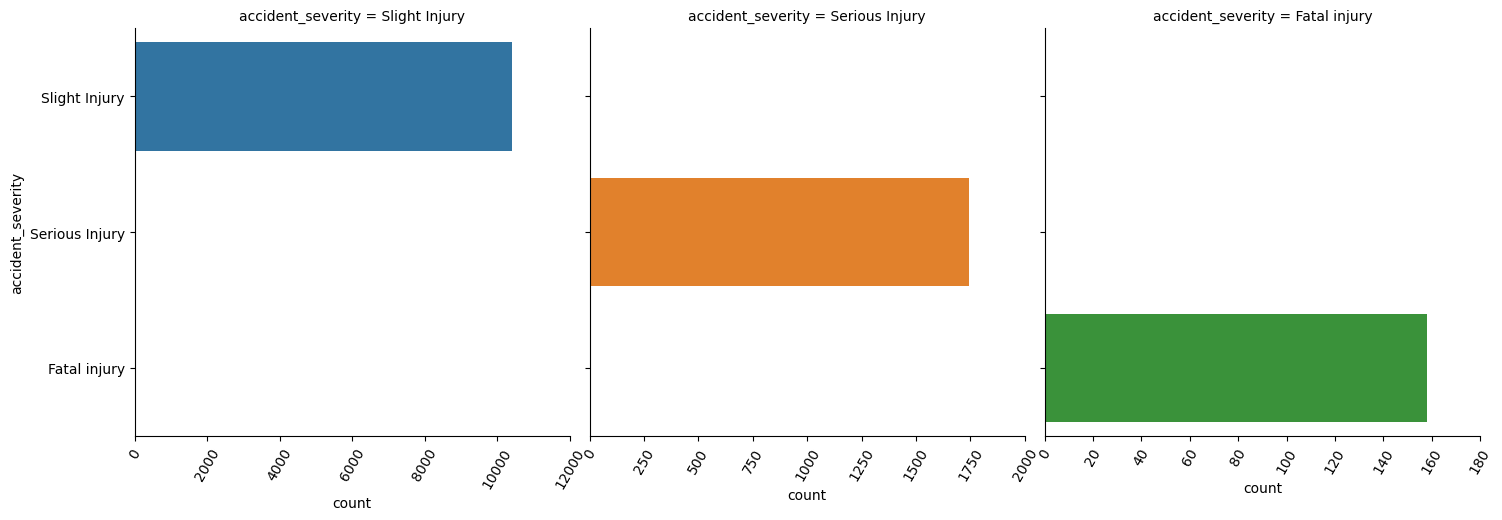

In [15]:
for col in categorical_columns:
    g = sns.catplot(y = col, kind='count', col = 'accident_severity', data=dataset, sharex=False)
    g.set_xticklabels(rotation=60)

Comment: The distribution of following columns is significantly different between classes: day_of_week, driving_experience, area_accident_occured, lanes_or_meridians, types_of_vehicles, casualty_class, sex_of_casualty, and cause_of_accident.

### Exploring numerical features

In [16]:
numerical_columns = [col for col in dataset.select_dtypes(exclude='object')]
print(numerical_columns)

['number_of_vehicles_involved', 'number_of_casualties', 'hour', 'minute']


In [17]:
# Summary statistics for numerical features
dataset.describe()

,number_of_vehicles_involved,number_of_casualties,hour,minute
count,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.040679,1.548149,13.835823,27.696736
std,0.688790,1.007179,5.202923,17.482604
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,10.000000,12.000000
50%,2.000000,1.000000,15.000000,30.000000
75%,2.000000,2.000000,18.000000,43.000000
max,7.000000,8.000000,23.000000,59.000000


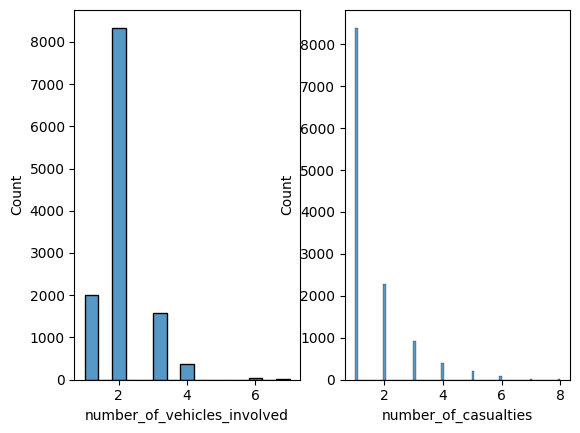

In [18]:
# Plotting histograms for the numerical data
fig, axs = plt.subplots(ncols=2)
sns.histplot(x='number_of_vehicles_involved', data=dataset, ax=axs[0])
sns.histplot(x='number_of_casualties', data=dataset, ax=axs[1])
plt.show()

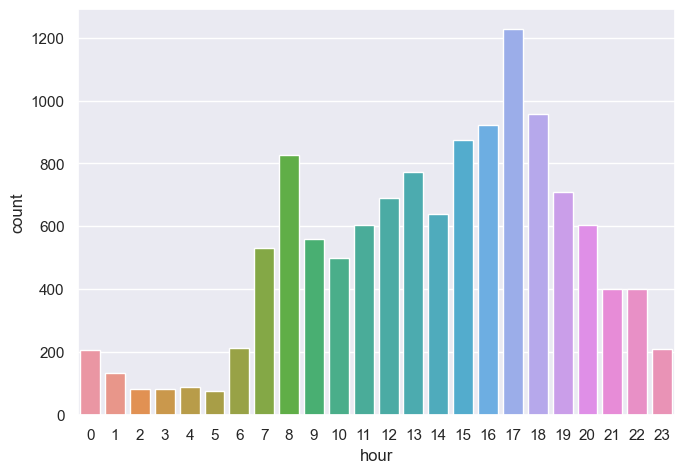

In [19]:
sns.set(rc={'figure.figsize':(7.7,5.27)})
sns.countplot(x='hour', data=dataset)
plt.show()

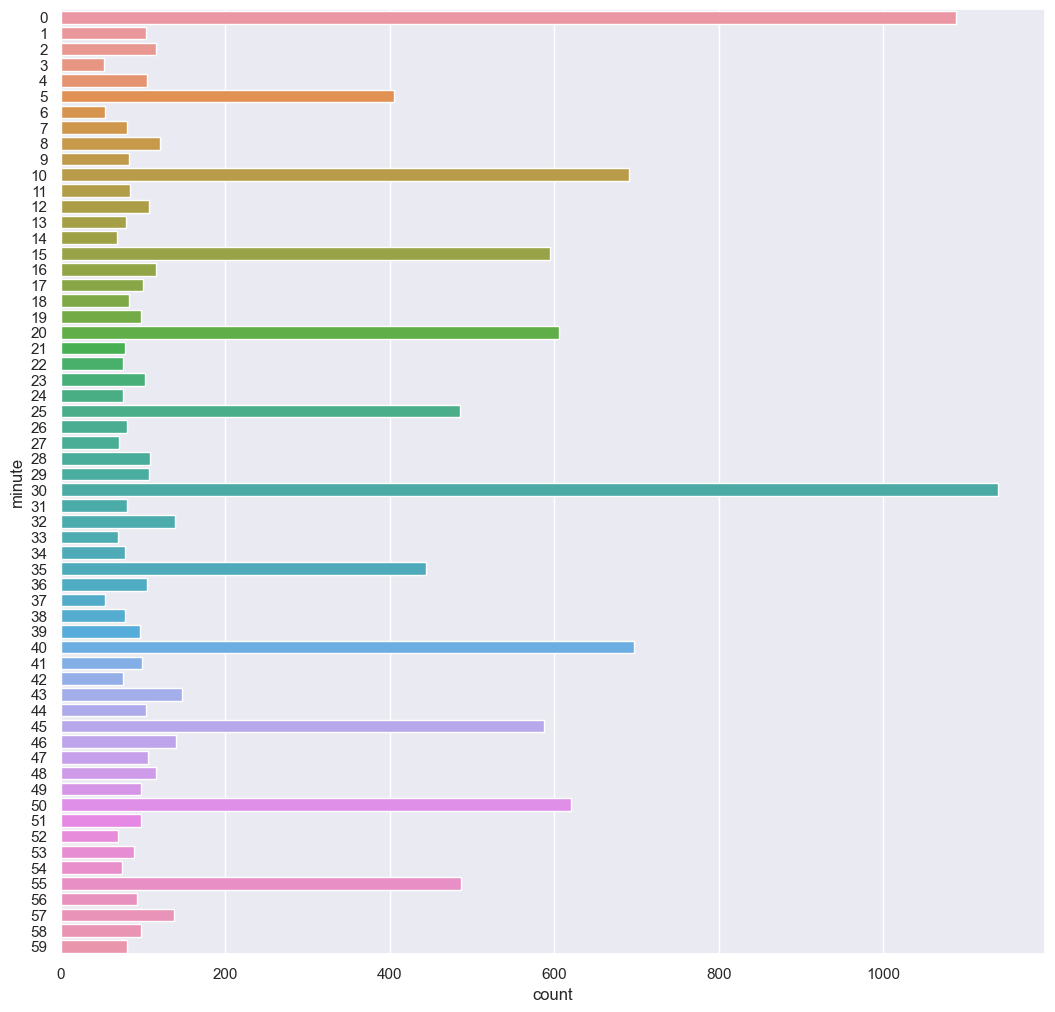

In [20]:
sns.set(rc={'figure.figsize':(12.7,12.27)})
sns.countplot(y='minute', data=dataset)
plt.show()

In [21]:
dataset['minute'] = dataset['minute'].apply(lambda x: (x//5)*5)

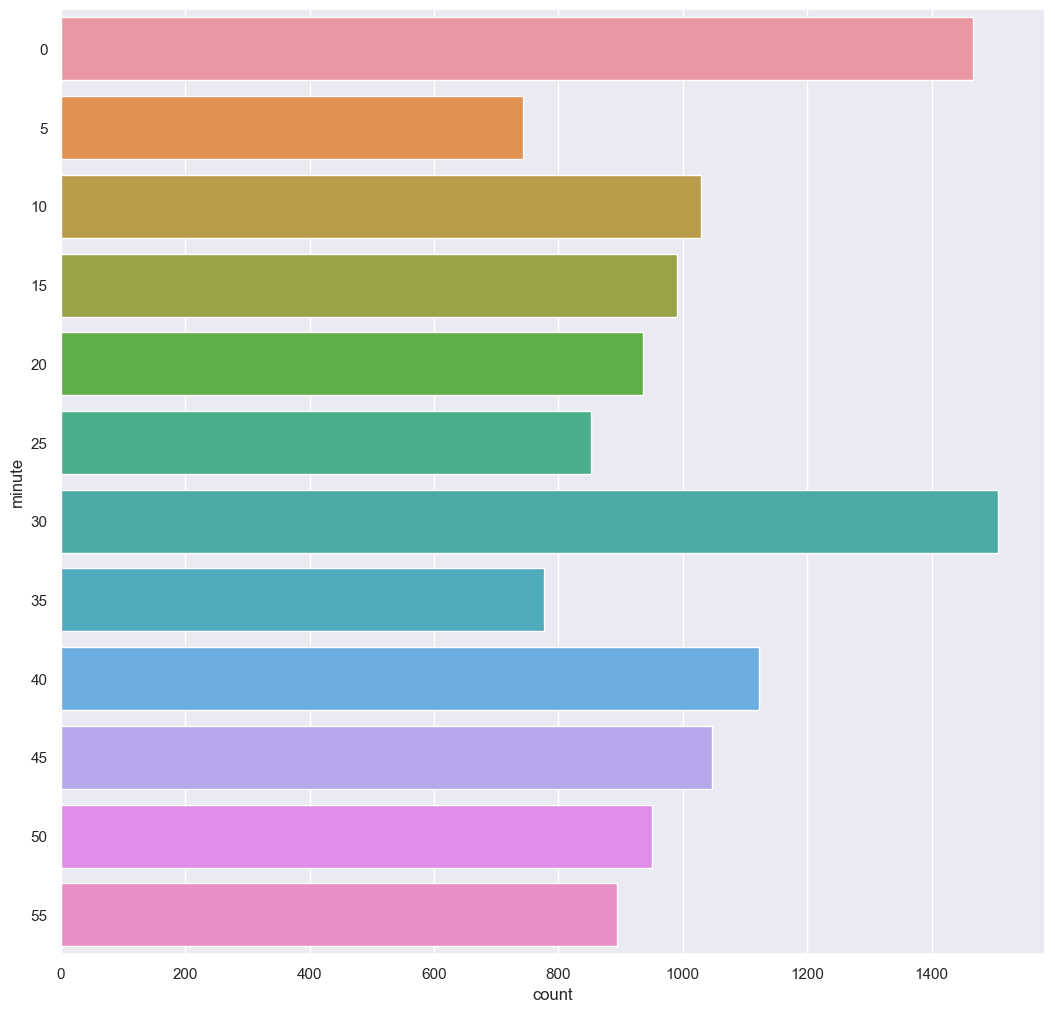

In [22]:
sns.countplot(y='minute', data=dataset)
plt.show()

# Preprocessing

In [23]:
X= dataset.copy()
y= X.pop("accident_severity")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Missing values

In [24]:
# Counting the number of missing values in each column
missing_values = dataset.isnull().sum()[dataset.isnull().sum()>0].sort_values(ascending=False)
percentage_missing_values = missing_values*100/len(dataset)
print(percentage_missing_values)

defect_of_vehicle          35.945112
service_year_of_vehicle    31.893472
work_of_casuality          25.966223
fitness_of_casuality       21.394933
type_of_vehicle             7.713543
types_of_junction           7.202014
driving_experience          6.731082
educational_level           6.016564
vehicle_driver_relation     4.701202
owner_of_vehicle            3.913608
lanes_or_medians            3.126015
vehicle_movement            2.500812
area_accident_occured       1.940565
road_surface_type           1.396557
type_of_collision           1.258525
road_allignment             1.152972
dtype: float64


In [25]:
cols_with_missing = missing_values.index.to_list()

In [26]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

In [27]:
# Imputation
my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

### Encoding

In [28]:
train_cat_cols = [x for x in categorical_columns if x!='accident_severity']
target_col = ['accident_severity']

In [29]:
# Make copy to avoid changing original data 
label_X_train = imputed_X_train_plus.copy()
label_X_valid = imputed_X_valid_plus.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
label_X_train[train_cat_cols] = ordinal_encoder.fit_transform(imputed_X_train_plus[train_cat_cols])
label_X_valid[train_cat_cols] = ordinal_encoder.transform(imputed_X_valid_plus[train_cat_cols])

### Resampling

<AxesSubplot:>

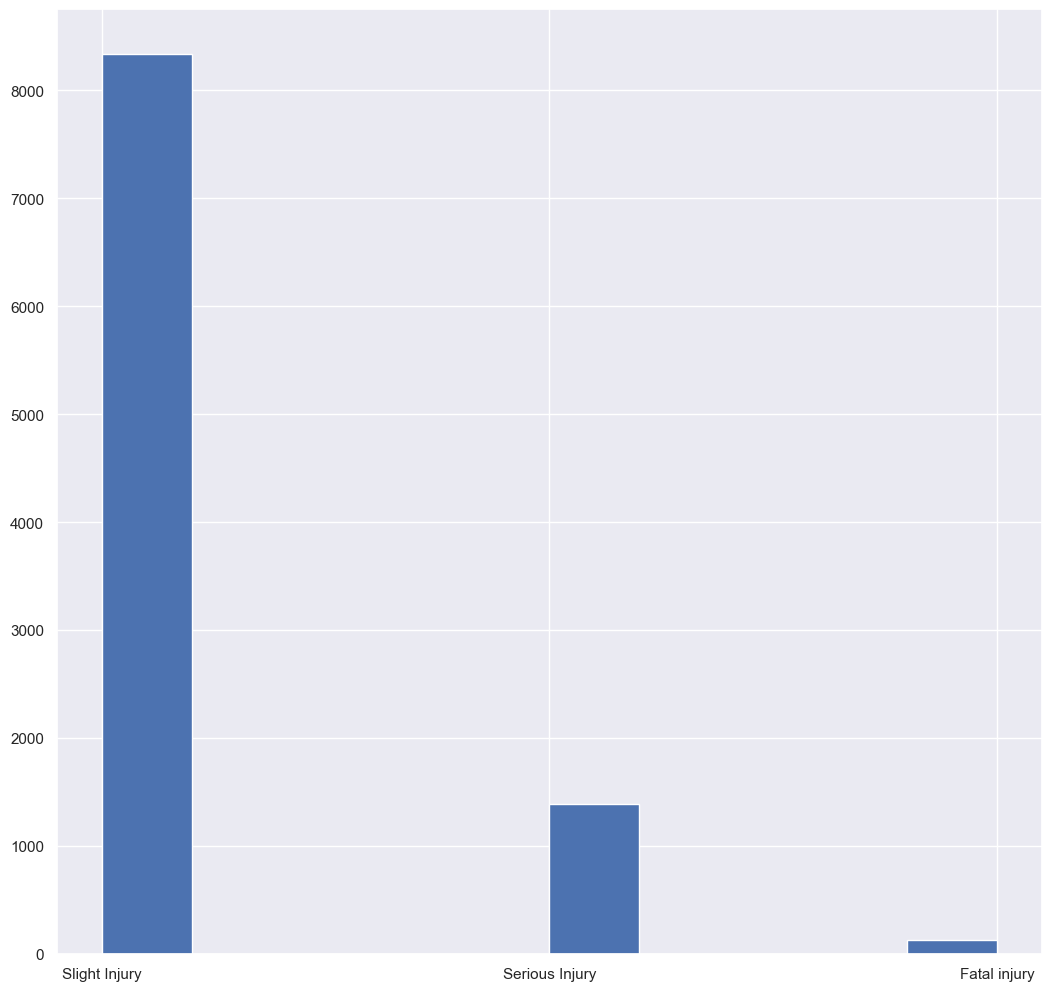

In [30]:
# Recall that (X_train, y_train) is highly imbalanced.
y_train.hist()

In [31]:
smt = SMOTETomek(sampling_strategy='auto', random_state=42)
X_smt, y_smt = smt.fit_resample(label_X_train, y_train)

print(label_X_train.shape)
print(X_smt.shape)

(9852, 48)
(25004, 48)


Fatal injury      8336
Slight Injury     8334
Serious Injury    8334
Name: accident_severity, dtype: int64


<AxesSubplot:>

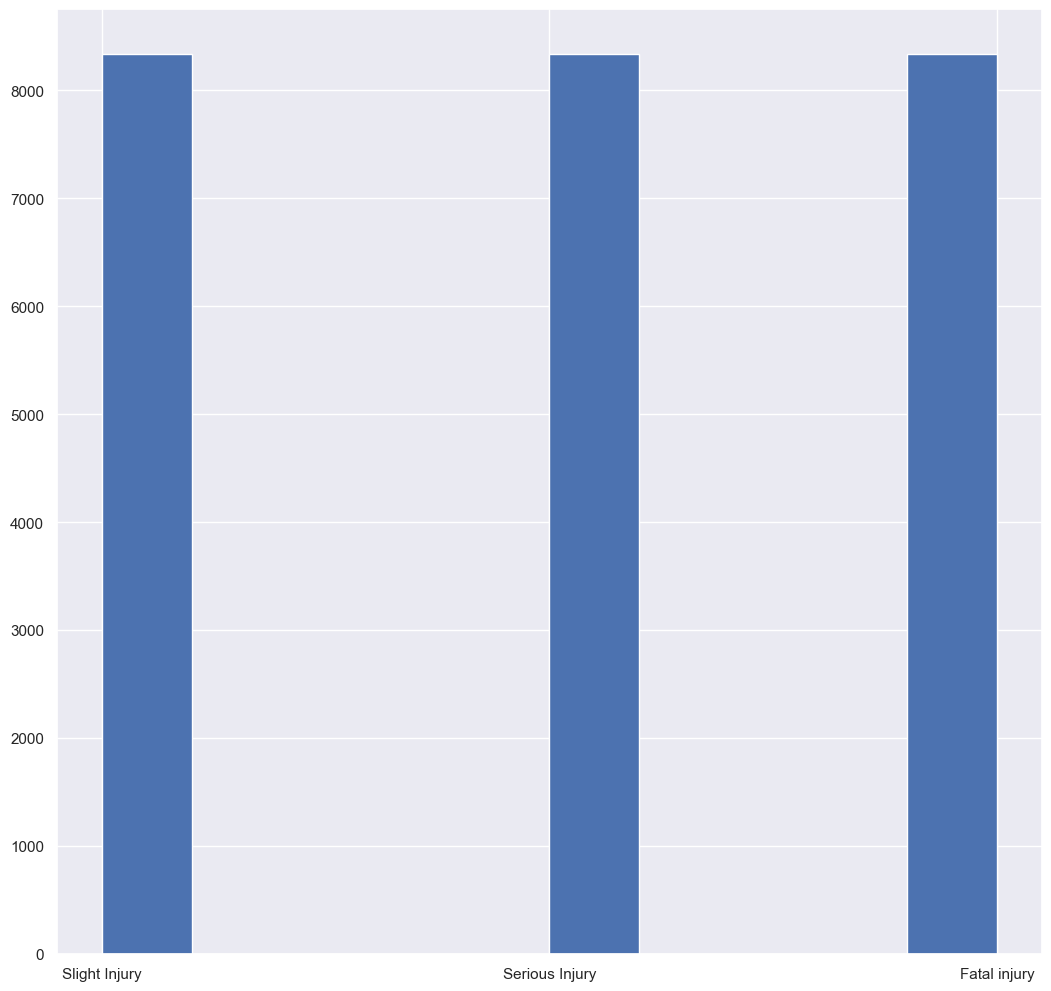

In [32]:
print(y_smt.value_counts())
y_smt.hist()

# Model Evaluation: Setting up a baseline

In [33]:
lr = LogisticRegression(max_iter=10000)
dt = DecisionTreeClassifier()
knc = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
svc = SVC()
nn = MLPClassifier(max_iter=10000)
adab = AdaBoostClassifier()
gb =  GradientBoostingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()

In [34]:
models = [('lr', lr), ('dt',dt), ('knc',knc), ('lda',lda), ('gnb',gnb), ('svc',svc), ('nn',nn), 
          ('adab',adab), ('gb',gb), ('rf',rf), ('et',et)]
kfold = KFold(n_splits=10, shuffle=True, random_state=2)
results = {}
for (name, model) in models:
    predictions = cross_val_predict(model, X_smt, y_smt, cv=kfold)
    score = f1_score(y_smt, predictions, average='weighted')
    results[name] = [score, predictions]
    print(name, round(score,3))

lr 0.527
dt 0.878
knc 0.796
lda 0.53
gnb 0.353
svc 0.668
nn 0.892
adab 0.74
gb 0.894
rf 0.945
et 0.973


In [35]:
for name, model in models:
    model.fit(X_smt, y_smt)
    y_valid_pred = model.predict(label_X_valid)
    score = f1_score(y_valid, y_valid_pred, average='weighted')
    print(name, round(score, 2))

lr 0.56
dt 0.75
knc 0.55
lda 0.56
gnb 0.32
svc 0.56
nn 0.71
adab 0.76
gb 0.77
rf 0.78
et 0.78


# Feature Selection

Insert computation of mutual information here.

Goal: To remove non-informative or redundant information.
Methods: Supervised or unsupervised. Supervised is further split into Intrinsic, Filter and Wrapper methods. Intrinsic is one a model performs feature selection during training. (Apparently Decision Trees do that.) Filter is when we use a statistic to filter out some features. 

Ideas:
1. Why does the minute feature have such high MI score? Is it that accidents are more dangerous late in the hour (maybe because people are rushing to get somewhere)?
2. Should hour feature be binned?
3. Should I consider one-hot encoding? Is there a reason why Ordinal Encoding causes more overfitting than One Hot Encoding?
4. Do I need to scale features to make their KDEs look Gaussian?
5. Does resampling through SMOTETomek change the distribution of features over each category or does it keep it the same?
6. Is it important to use LabelEncoder to encode target variable?
7. Should I compute MI or correlation between different features to reduce correlation?
8. Use dimensionality reduction?

### Mutual Information:

In [36]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]): # Ordinal Encoding
        # OrdinalEncoding is in Scikit-Learn, Pandas has Series.factorize() that
        # performs the same job
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [37]:
mi_scores = make_mi_scores(X, y)

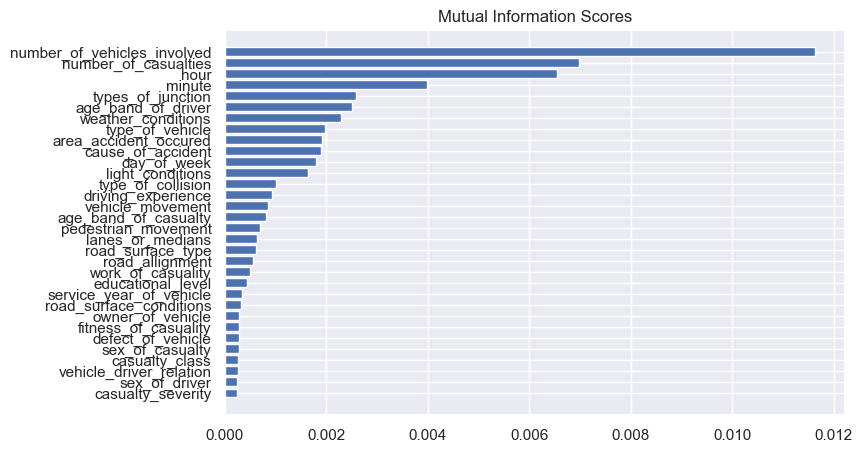

In [38]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [39]:
features = list(mi_scores.head(10).index)

In [40]:
X_smt.shape

(25004, 48)

In [41]:
y_smt.shape

(25004,)

In [42]:
for col in features:
    if col+"_was_missing" in X_smt.columns:
        features.append(col+'_was_missing')

In [43]:
len(features)

13

In [44]:
X_smt_fs = X_smt[features]
X_smt_fs.shape

(25004, 13)

In [45]:
print(label_X_valid.shape)
label_X_valid_fs = label_X_valid[features]
label_X_valid_fs.shape

(2464, 48)


(2464, 13)

In [46]:
results_fs = {}
for (name, model) in models:
    predictions = cross_val_predict(model, X_smt_fs, y_smt, cv=kfold)
    score = f1_score(y_smt, predictions, average='weighted')
    results_fs[name] = [score, predictions]
    print(name, round(score,3))

lr 0.485
dt 0.882
knc 0.838
lda 0.493
gnb 0.468
svc 0.568
nn 0.777
adab 0.688
gb 0.851
rf 0.947
et 0.966


In [47]:
for name, model in models:
    model.fit(X_smt_fs, y_smt)
    y_valid_pred = model.predict(label_X_valid_fs)
    score = f1_score(y_valid, y_valid_pred, average='weighted')
    print(name, round(score, 2))

lr 0.56
dt 0.77
knc 0.64
lda 0.56
gnb 0.4
svc 0.51
nn 0.76
adab 0.73
gb 0.78
rf 0.8
et 0.81


# Hyperparameter Tuning

In [183]:
param_grid = { 
    'n_estimators': [50, 100, 150],
    'max_depth' : [2,6,10,None],
    'criterion' :['gini', 'entropy', 'log_loss']
}

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rf.fit(X_smt_fs, y_smt)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 6, 10, None],
                         'n_estimators': [50, 100, 150]})

In [187]:
CV_rf.best_score_

0.9452598960415834

In [184]:
CV_rf.best_params_

{'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 100}

In [188]:
rf_best = RandomForestClassifier(criterion='log_loss',max_depth=None, n_estimators=100)
rf_best.fit(X_smt_fs, y_smt)
pred_rf_best = model.predict(label_X_valid_fs)
score = f1_score(y_valid, pred_rf_best, average='weighted')

In [189]:
print(score)

0.8092194559118094


# Model Deployment on Heroku

In [51]:
import streamlit as st

In [52]:
import joblib

joblib.dump(et, 'ExtraTreesClassifier.joblib')

['ExtraTreesClassifier.joblib']

In [ ]:
# Can load the model from joblib file and use it to make a prediction as follows.
#model = joblib.load('ExtraTreesClassifier.joblib')
#model.predict([...]) # given input here.

In order to transfer the model to a friend, we can just share the joblib file.